# Описание проекта

Необходимо создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

Идея создания такой системы находится в стадии предварительного обсуждения и проработки. Чёткого алгоритма работы и подобных решений на рынке ещё не существует. Текущая задача — понять, возможно ли предсказывать ДТП, опираясь на исторические данные одного из регионов.

Идея решения задачи от заказчика:

1.  Создать модель предсказания ДТП (целевое значение — **at_fault (виновник)** в таблице **parties)**
    -   Для модели выбрать тип виновника — только машина (**car**).
    -   Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).
    -   Для моделирования ограничиться данными за 2012 год — они самые свежие.
    -   Обязательное условие — учесть фактор возраста автомобиля.
2.  На основе модели исследовать основные факторы ДТП.
3.  Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
    -   Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
    -   Какие ещё факторы нужно учесть?
    -   Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

Заказчик предлагает вам поработать с базой данных по происшествиям и сформировать свои идеи создания такой системы.

## Описание таблиц данных

### ER - диаграмма

![image](https://pictures.s3.yandex.net/resources/1.7_2880border_1_1654004672.png)

### **collisions (информация о происшествиях)**

|                      Описание                      |    Обозначение в таблице    |                                                                         Подробнее                                                                        |
|:--------------------------------------------------:|:---------------------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------:|
| Идентификационный  Номер в базе данных             | CASE_ID                     | Уникальный номер для зарегистрированного происшествия в таблице происшествий.                                                                            |
| Дата происшествия                                  | COLLISION_DATE              | Формат год/месяц/день                                                                                                                                    |
| Время происшествия                                 | COLLISION_TIME              | Формат: 24-часовой                                                                                                                                       |
| Является ли место происшествие перекрёстком        | INTERSECTION                | Y — Intersection (перекрёсток)                                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | N — Not Intersection (не перекрёсток)                                                                                                                    |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | -- — Not stated (Не указано)                                                                                                                             |
| Погода                                             | WEATHER_1                   | A — Clear (Ясно)                                                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Cloudy (Облачно)                                                                                                                                     |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Raining (Дождь)                                                                                                                                      |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Snowing (Снегопад)                                                                                                                                   |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | E — Fog (Туман)                                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | F — Other (Другое)                                                                                                                                       |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | G — Wind (Ветер)                                                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Серьёзность происшествия                           | COLLISION_DAMAGE            | 1 — FATAL ТС (Не подлежит восстановлению)                                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 2 — SEVERE DAMAGE (Серьёзный ремонт, большая часть под замену/Серьёзное повреждение капитального строения)                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 3 — MIDDLE DAMAGE (Средний ремонт, машина в целом на ходу/Строение в целом устояло)                                                                      |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 4 — SMALL DAMAGE (Отдельный элемент кузова под замену/покраску)                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 0 – SCRATCH (Царапина)                                                                                                                                   |
| Основной фактор аварии                             | PRIMARY_COLL_FACTOR         | A — Code Violation (Нарушение правил ПДД)                                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Other Improper Driving (Другое неправильное вождение)                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Other Than Driver (Кроме водителя)                                                                                                                   |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Unknown (Неизвестно)                                                                                                                                 |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | E — Fell Asleep (Заснул)                                                                                                                                 |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Состояние дороги                                   | ROAD_SURFACE                | A — Dry (Сухая)                                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Wet (Мокрая)                                                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Snowy or Icy (Заснеженная или обледенелая)                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Slippery (Muddy, Oily, etc.) (Скользкая, грязная, маслянистая и т. д.)                                                                               |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Освещение                                          | LIGHTING                    | A — Daylight (Дневной свет)                                                                                                                              |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Dusk-Dawn (Сумерки-Рассвет)                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Dark-Street Lights (Темно-Уличные фонари)                                                                                                            |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Dark-No Street Lights (Темно-Нет уличных фонарей)                                                                                                    |
|                                                    |                             | E — Dark-Street Lights Not Functioning (Темно-Уличные фонари не работают)                                                                                |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Номер географических районов, где произошло ДТП    | COUNTY_CITY_LOCATION        | число                                                                                                                                                    |
| Названия географических районов, где произошло ДТП | COUNTY_LOCATION             | список разных названий, категориальный тип данных                                                                                                        |
| Направление движения                               | DIRECTION                   | N — North (Север)                                                                                                                                        |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | E — East (Восток)                                                                                                                                        |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | S — South (Юг)                                                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | W — West (Запад)                                                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - or blank — Not State (Не указано)                                                                                                                      |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | на перекрёстке                                                                                                                                           |
| Расстояние от главной дороги (метры)               | DISTANCE                    | число                                                                                                                                                    |
| Тип дороги                                         | LOCATION_TYPE               | H — Highway (Шоссе)                                                                                                                                      |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | I — Intersection (Перекрёсток)                                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | R — Ramp (or Collector) (Рампа)                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - or blank — Not State Highway (Не указано)                                                                                                              |
| Количество участников                              | PARTY_COUNT                 | число                                                                                                                                                    |
| Категория нарушения                                | PCF_VIOLATION_CATEGORY      | 01 — Driving or Bicycling Under the Influence of Alcohol or Drug (Вождение или езда на велосипеде в состоянии алкогольного или наркотического опьянения) |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 02 — Impeding Traffic (Препятствие движению транспорта)                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 03 — Unsafe Speed (Превышение скорости)                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 04 — Following Too Closely (Опасное сближение)                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 05 — Wrong Side of Road (Неправильная сторона дороги)                                                                                                    |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 06 — Improper Passing (Неправильное движение)                                                                                                            |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 07 — Unsafe Lane Change (Небезопасная смена полосы движения)                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 08 — Improper Turning (Неправильный поворот)                                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 09 — Automobile Right of Way (Автомобильное право проезда)                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 10 — Pedestrian Right of Way (Пешеходное право проезда)                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 11 — Pedestrian Violation (Нарушение пешеходами)                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 12 — Traffic Signals and Signs (Дорожные сигналы и знаки)                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 13 — Hazardous Parking (Неправильная парковка)                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 14 — Lights (Освещение)                                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 15 — Brakes (Тормоза)                                                                                                                                    |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 16 — Other Equipment (Другое оборудование)                                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 17 — Other Hazardous Violation (Другие нарушения)                                                                                                        |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 18 — Other Than Driver (or Pedestrian) (Кроме водителя или пешехода)                                                                                     |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 19 — Speeding (Скорость)                                                                                                                                 |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 20 — Pedestrian dui (Нарушение пешехода)                                                                                                                 |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 21 — Unsafe Starting or Backing (Опасный старт)                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 22 — Other Improper Driving (Другое неправильное вождение)                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 23 — Pedestrian or “Other” Under the Influence of Alcohol or Drug (Пешеход или «Другой» в состоянии алкогольного или наркотического опьянения)           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 24 — Fell Asleep (Заснул)                                                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 00 — Unknown (Неизвестно)                                                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Тип аварии                                         | TYPE_OF_COLLISION           | A — Head-On (Лоб в лоб)                                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Sideswipe (Сторона)                                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Rear End (Столкновение задней частью)                                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Broadside (Боковой удар)                                                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | E — Hit Object (Удар объекта)                                                                                                                            |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | F — Overturned (Опрокинутый)                                                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | G — Vehicle (транспортное средство/ Пешеход)                                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | H — Other (Другое)                                                                                                                                       |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Дополнительные участники ДТП                       | MOTOR_VEHICLE_INVOLVED_WITH | Other motor vehicle (Другой автомобиль)                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Fixed object (Неподвижный объект)                                                                                                                        |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Parked motor vehicle (Припаркованный автомобиль)                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Pedestrian (Пешеход)                                                                                                                                     |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Bicycle (Велосипедист)                                                                                                                                   |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Non-collision (Не столкновение)                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Other object (Другой объект)                                                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Motor vehicle on other roadway (Автомобиль на другой проезжей)                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Animal (Животное)                                                                                                                                        |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Train (Поезд)                                                                                                                                            |
| Дорожное состояние                                 | ROAD_CONDITION_1            | A — Holes, Deep Ruts (Ямы, глубокая колея)                                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Loose Material on Roadway (Сыпучий материал на проезжей части)                                                                                       |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Obstruction on Roadway (Препятствие на проезжей части)                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Construction or Repair Zone (Зона строительства или ремонта)                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | E — Reduced Roadway Width (Уменьшенная ширина проезжей части)                                                                                            |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | F — Flooded (Затоплено)                                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | G — Other (Другое)                                                                                                                                       |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | H — No Unusual Condition (Нет ничего необычного)                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Устройство управления                              | CONTROL_CONDITION_1         | A — Functioning (Функционирует)                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Not Functioning (Не функционирует)                                                                                                                   |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Obscured (Затемнённый)                                                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — None (Нет)                                                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |

### **Parties (описание участников происшествия)**

|                                                                            |                       |                                                                               |
|----------------------------------------------------------------------------|-----------------------|-------------------------------------------------------------------------------|
|                                  Описание                                  | Обозначение в таблице |                                   Подробнее                                   |
| Идентификационный  номер в базе данных                                     | CASE_ID               | Уникальный номер для зарегистрированного происшествия в таблице происшествий. |
| Номер участника происшествия                                               | PARTY_NUMBER          | От 1 до N — по числу участников происшествия                                  |
| Тип участника происшествия                                                 | PARTY_TYPE            | 1 — Car (Авто)                                                                |
|                                                                            |                       |                                                                               |
|                                                                            |                       | 2 — Road bumper (Дорожные знаки)                                              |
|                                                                            |                       |                                                                               |
|                                                                            |                       | 3 — Building (Строения)                                                       |
|                                                                            |                       |                                                                               |
|                                                                            |                       | 4 — Road signs (Отбойник)                                                     |
|                                                                            |                       |                                                                               |
|                                                                            |                       | 5 — Other (Другое)                                                            |
|                                                                            |                       |                                                                               |
|                                                                            |                       | 6 — Operator (Оператор)                                                       |
|                                                                            |                       |                                                                               |
|                                                                            |                       | - — Not Stated (Не указано)                                                   |
| Виновность участника                                                       | AT_FAULT              | 0/1                                                                           |
| Сумма страховки (тыс. $)                                                   | INSURANCE_PREMIUM     | число                                                                         |
| Состояние участника: физическое или с учётом принятых лекарств             | PARTY_DRUG_PHYSICAL   | E — Under Drug Influence (Под воздействием лекарств)                          |
|                                                                            |                       |                                                                               |
|                                                                            |                       | F — Impairment — Physical (Ухудшение состояния)                               |
|                                                                            |                       |                                                                               |
|                                                                            |                       | G — Impairment Unknown (Не известно)                                          |
|                                                                            |                       |                                                                               |
|                                                                            |                       | H — Not Applicable (Не оценивался)                                            |
|                                                                            |                       |                                                                               |
|                                                                            |                       | I — Sleepy/Fatigued (Сонный/Усталый)                                          |
|                                                                            |                       |                                                                               |
|                                                                            |                       | - — Not Stated (Не указано)                                                   |
| Трезвость участника                                                        | PARTY_SOBRIETY        | A — Had Not Been Drinking (Не пил)                                            |
|                                                                            |                       |                                                                               |
|                                                                            |                       | B — Had Been Drinking, Under Influence (Был пьян, под влиянием)               |
|                                                                            |                       |                                                                               |
|                                                                            |                       | C — Had Been Drinking, Not Under Influence (Был пьян, не под влиянием)        |
|                                                                            |                       |                                                                               |
|                                                                            |                       | D — Had Been Drinking, Impairment Unknown (Был пьян, ухудшение неизвестно)    |
|                                                                            |                       |                                                                               |
|                                                                            |                       | G — Impairment Unknown (Неизвестно ухудшение)                                 |
|                                                                            |                       |                                                                               |
|                                                                            |                       | H — Not Applicable (Не оценивался)                                            |
|                                                                            |                       |                                                                               |
|                                                                            |                       | - — Not Stated (Не указано)                                                   |
| Наличие телефона в автомобиле (возможности разговаривать по громкой связи) | CELLPHONE_IN_USE      | 0/1                                                                           |
|                                                                            |                       |                                                                               |

### Vehicles  **(Описание автомобиля)**

|                Описание               | Обозначение в таблице |                                   Подробнее                                   |
|:-------------------------------------:|:---------------------:|:-----------------------------------------------------------------------------:|
| Индекс текущей таблицы                | ID                    | Номер в таблице                                                               |
| Идентификационный номер в базе данных | CASE_ID               | Уникальный номер для зарегистрированного происшествия в таблице происшествий. |
| Тип кузова                            | VEHICLE_TYPE          | MINIVAN                                                                       |
|                                       |                       |                                                                               |
|                                       |                       | COUPE                                                                         |
|                                       |                       |                                                                               |
|                                       |                       | SEDAN                                                                         |
|                                       |                       |                                                                               |
|                                       |                       | HATCHBACK                                                                     |
|                                       |                       |                                                                               |
|                                       |                       | OTHER                                                                         |
| Тип КПП                               | VEHICLE_TRANSMISSION  | auto (Автоматическая)                                                         |
|                                       |                       |                                                                               |
|                                       |                       | manual (Ручная)                                                               |
|                                       |                       |                                                                               |
|                                       |                       | - — Not Stated (Не указано)                                                   |
| Возраст автомобиля (в годах)          | VEHICLE_AGE           | число                                                                         |

# Подключитесь к базе. Загрузите таблицы sql

# Библиотеки, config и функции

## Библиотеки

In [1]:
import warnings
import time
import re


import pandas as pd
import numpy as np
from sqlalchemy import create_engine


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import torch
import torch.nn as nn
import torch.optim as optim

from skorch.callbacks import EpochScoring, EarlyStopping
from skorch.dataset import ValidSplit
from skorch import NeuralNetClassifier


from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import optuna

## Config

In [25]:
DB_CONFIG = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-science-vehicle-db' # название базы данных
} 

CONNECTION_STR = 'postgresql://{}:{}@{}:{}/{}'.format(
    DB_CONFIG['user'],
    DB_CONFIG['pwd'],
    DB_CONFIG['host'],
    DB_CONFIG['port'],
    DB_CONFIG['db']
)

ENGINE = create_engine(
    CONNECTION_STR + "?options=--transaction-mode=autocommits?slmode=disable",
    isolation_level=None)

DATE_FLAG = "BETWEEN '2012.01.01' AND '2012.12.31'"
COLLISION_TYPE_FLAG = "NOT LIKE 'scratch'"
VEHICLE_TYPE_FLAG = "LIKE 'car'"

RANDOM_STATE = 42
TEST_SIZE = 0.2

SCALER = MinMaxScaler()
OHE = OneHotEncoder(drop='first')
OE = OrdinalEncoder()

TASK_TYPE = "CPU"

def auc(y_true, y_prob):
    return roc_auc_score(y_true, y_prob, average=None)
SCORER = make_scorer(auc)


sns.set_theme(style="white")

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

warnings.filterwarnings('ignore')

torch.manual_seed(RANDOM_STATE)
torch.use_deterministic_algorithms(True)

## Функции

### Замер времени

In [3]:
def exec_time(start, end):
    '''
    This function calculates the difference between two given datetime objects
    and returns the difference in the format of HH:MM:SS.

    Parameters
    start: datetime object
    end: datetime object
    Returns
    diff_time (str): The difference between the two given datetime objects in
                     the format of HH:MM:SS.
    '''
    diff_time = end - start
    m, s = divmod(diff_time, 60)
    h, m = divmod(m, 60)
    s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))

    return "Completed for {0:02d}:{1:02d}:{2:02d}".format(h, m, s)

### Работа с данными

In [4]:
def df_quik_view(df, asc=False, print_time=True):
    '''
    This function provides a quick overview of the input DataFrame by
    returning a summary table containing information such as number of
    unique values, missing values, data type, completeness percentage, and
    unique values of each column in the DataFrame. It also prints general 
    information such as the shape of the table, the number and percentage of
    duplicates in the table, and the memory usage of the table.
    
    Parameters:
    df (pd.DataFrame): a pandas DataFrame to analyze.
    asc (bool): a boolean value indicating whether to sort unique values in
                ascending order. Default is False, which means descending order.
    
    Returns:
    pd.DataFrame: a summary table of the input DataFrame containing the number
                  of unique values, missing values, data type, completeness
                  percentage, and unique values of each column.
    '''
    start = time.time() if print_time else None

    unique_values = []
    for i in df.columns:
        unique_values.append(df[i].sort_values(ascending=asc).unique())

    nans = df.isna().sum()
    table_scan = pd.DataFrame(
        {
            'values_num':    df.count(),
            'nulls_num':     df.isna().sum(),
            'completeness':  100 - (nans / (nans + df.notna().sum()) * 100),
            'uniques_num':   df.nunique(),
            'unique_values': unique_values,
            'dtype':         df.dtypes
        }
    )

    df_shape = df.shape
    duplicates = df.duplicated().sum()
    memory = df.memory_usage(index=False).sum() / 1_000_00
    print('General data analysis:')
    print()
    print('Shape of the table:     ', df_shape)
    print('Duplicates in the table: {}, ({}%)'
          .format(duplicates, round(duplicates / df_shape[0], 4) * 100)
         )
    print('Memory usage:            ' + str(round(memory, 1)) + '+ MB')
    print()

    if print_time:
        end = time.time()
        print('\n')
        print("======================")
        print(exec_time(start, end))
        print("======================")
    
    return table_scan

In [5]:
def sql_query(query, engine=ENGINE, print_time=True):
    if print_time:
        start = time.time()
        table = pd.read_sql_query(query, con=engine)
        end = time.time()
            
        print("Query " + exec_time(start, end).lower())
        print("============================")
        print("\n")

        return table
    else:
        return pd.read_sql_query(query, con=self.engine)

In [6]:
def change_dtypes(data, **dtypes):
    '''
    This function changes the data types of the specified columns in a pandas
    DataFrame and returns the updated DataFrame.
        
    Parameters:
    data (pd.DataFrame): a pandas DataFrame to modify.
    **dtypes (dict): keyword arguments representing the column names and
    new data types to apply to the columns.
        
    Returns:
    pd.DataFrame: a pandas DataFrame with updated data types for the
    specified columns.
    '''
    memory_before = data.memory_usage(index=False).sum()
    print(f'Initial value of memory usage:                 ', memory_before)

    data = data.astype(dtypes)

    memory_after = data.memory_usage(index=False).sum()
    memory_percent = round(
        (memory_before - memory_after) / memory_before * 100,2)

    print('Value of memory usage after changing data types:', memory_after)
    print()
    print(f'Memory usage reduced by {memory_percent}%', '\n')

    return data

In [7]:
def remove_outs(data, feature, drop):
    data = data[feature]

    i = data.quantile(q=0.75) - data.quantile(q=0.25)

    w1 = data.quantile(q=0.25) - (1.5 * i)
    w2 = data.quantile(q=0.75) + (1.5 * i)

    if drop:
        if w1 > data.min():
            data = data.where(data > w1, None)
        data = data.where(data < w2, None)
    else:
        if w1 > data.min():
            data = data.apply(lambda x: w1 if x < w1 else x)
        data = data.apply(lambda x: w2 if x > w2 else x)
    
    return data

### Визуализация данных

In [8]:
def analyze_data(data, x, y, rotation=45, hue=None, figsize=None):
    color = '#CC8963' if hue is None else None
    data[x] = data[x].fillna("Missing")

    sns.set_theme(style="whitegrid")
    print('Visualization of categorical data')
    print()

    figure, (ax_bar) = plt.subplots(
                1, 1, figsize=(18, 5) if figsize is None else figsize)
    sns.barplot(data=data, x=x, y=y, hue=hue,
                linewidth=0.5, ax=ax_bar,
                color=color, alpha=0.8).set_title(
                    f"{x} distribution by {y}", y=1.02, fontsize=14)

    ax_bar.tick_params(axis='x', rotation=rotation)
    plt.show()
    print()

In [9]:
def create_visualization(data, dtype, target, is_cat_target=False,
                         figsize=None, bins=50):
    '''
    This function creates visualizations for scalar and categorical
    features and the target variable. It uses the seaborn and matplotlib
    libraries for plotting.

    Parameters:
    data (pandas.DataFrame): The dataset to be visualized.
    dtype (str): Type of visualization to be created. 'scalars' for quantitative
                 features, 'categories' for categorical features and target
                 variable prevalence, 'target' for target variable distribution.
    target (str): The name of the target variable.
    is_cat_target (bool, optional): If True, the target variable is categorical.
                                    Default is False.
    figsize (tuple, optional): Figure size. Default is None.
    bins (int, optional): Number of bins for histograms. Default is 50.

    Returns:
    None.
    '''
    sns.set_theme(style="white")
    if dtype == 'scalars':
        target_nunique = data[target].nunique()

        print('Visualization of quantitative features distribution:')
        print()

        if is_cat_target:
            for i in data.drop(target, axis=1):
                if data[i].dtype != 'O' and data[i].unique().shape[0] > 10:
                    print(f'Feature: {i}')

                    figure, (ax_box, ax_hist) = plt.subplots(
                        2, 1, sharex=True,
                        gridspec_kw={'height_ratios': (.3, .7)},
                        figsize=(9, 7) if figsize is None else figsize)

                    sns.despine(fig=None, ax=None, top=True, right=True,
                                left=False, bottom=False, offset=None,
                                trim=False)

                    sns.boxplot(data=data, x=i, y=target, orient='h',
                                ax=ax_box, palette={0: '#008744', 1: '#d62d20'}
                                ).set_title(i, y=1.5, fontsize=14)
                    sns.histplot(data=data, x=i, hue=target, kde=True, 
                                 bins=bins, palette={0: '#008744',
                                                     1: '#d62d20'}
                                                     ).set_ylabel('Amount')

                    plt.show()
                    print()
                    print('Feature statistics:')
                    display(pd.DataFrame(data[i].describe()).apply(round,
                                                                   args=[2]))
        else:
            for i in data.drop(target, axis=1):
                if data[i].dtype != 'O' and not is_cat_target:
                    print(f'Feature: {i}')

                    figure, (ax_box, ax_hist) = plt.subplots(
                        2, 1, sharex=True,
                        gridspec_kw={'height_ratios': (.3, .7)},
                        figsize=(9, 7) if figsize is None else figsize)

                    sns.despine(fig=None, ax=None, top=True, right=True,
                                left=False, bottom=False, offset=None,
                                trim=False)

                    sns.boxplot(data=data, x=i, ax=ax_box).set_title(
                        i, y=1.5, fontsize=14)
                    sns.histplot(data=data, x=i, kde=True, bins=bins
                                 ).set_ylabel('Amount')

                    plt.show()
                    print()
                    print('Feature statistics:')
                    display(pd.DataFrame(data[i].describe()).apply(round,
                                                                   args=[2]))
    elif dtype == 'categories':
        sns.set_theme(style="whitegrid")
        print('Visualization of categorical features and target prevalence:')
        print()

        for i in data.drop(target, axis=1):
            if data[i].dtype in ['O', 'category'] or is_cat_target:
                try:
                    data[i] = data[i].fillna("Missing")
                except: # if dtype is 'category'
                    data[i] = data[i].cat.add_categories("Missing")
                    data[i] = data[i].fillna("Missing")
                    
                bar_data = data[i].value_counts().reset_index().rename(
                    columns={'index': data[i].name, data[i].name: 'Count'}
                    ).sort_values(by=i)

                if is_cat_target:
                    prev_data = (data.groupby([i])[target]
                                 .value_counts(normalize=True)
                                 .reset_index(name='prevalance'))
                    prev_data['prevalance'] = (
                        prev_data['prevalance'].round(4) * 100)
                else:
                    prev_data = (data.groupby([i])[target]
                                 .mean()
                                 .reset_index(name='target_mean'))
                    prev_data['target_mean'] = prev_data['target_mean'].round(2)

                print(f'Feature: {i}')

                figure, (ax_bar, ax_prev) = plt.subplots(
                    1, 2, figsize=(18, 5) if figsize is None else figsize)

                sns.barplot(data=bar_data, x=i, y='Count',
                            linewidth=0.5, ax=ax_bar,
                            color='#CC8963', alpha=0.8).set_title(
                                f'{i} distribution', y=1.02, fontsize=14)
                if is_cat_target:
                    try:
                        sns.barplot(data=prev_data, x=i, y='prevalance',
                                    hue=target, linewidth=0.5,
                                    palette={0: '#008744', 1: '#d62d20'},
                                    ax=ax_prev, alpha=0.8).set_title(
                                        f'target prevalence, %', y=1.02,
                                        fontsize=14)
                    except:
                        sns.barplot(data=prev_data, x=i, y='prevalance',
                                    hue=target, ax=ax_prev, alpha=0.8
                                    ).set_title(f'target prevalence, %', y=1.02,
                                                fontsize=14)
                else:
                    sns.barplot(data=prev_data, x=i, y='target_mean',
                                color='#008744', alpha=0.8).set_title(
                                    f'target means', y=1.02, fontsize=14)

                r_ = 0 if bar_data.shape[0] < 5 else 90
                ax_bar.tick_params(axis='x', rotation=r_)
                ax_prev.tick_params(axis='x', rotation=r_)

                plt.show()
                print()
    elif dtype == 'target':
        print('Visualization of target distribution:')
        print()
        print(f'Target: {target}')

        if is_cat_target:
            plt.figure(figsize=(5, 5) if figsize is None else figsize)

            target_ = data[target].value_counts().reset_index().rename(
                columns={'index': data[target].name,
                         data[target].name: 'Amount'})

            sns.barplot(
                data=target_,
                x=target, y='Amount'
            ).set_title(f"Target {target} categories", y=1.02, fontsize=14)

            plt.show()
            print()
            print('Target statistics:')
            display(pd.DataFrame(data[target].describe()))
        else:
            print('Visualization of target distribution:')
            print()
            print(f'Target: {target}')

            figure, (ax_box, ax_hist) = plt.subplots(
                2, 1, sharex=True, gridspec_kw={'height_ratios': (.25, .75)},
                figsize=(9, 7) if figsize is None else figsize)

            sns.despine(fig=None, ax=None, top=True, right=True, left=False,
                        bottom=False, offset=None, trim=False)

            sns.boxplot(data=data,
                        x=target, ax=ax_box
            ).set_title(f"Target {target} distribution", y=1.5, fontsize=14)
            sns.histplot(data=data, x=target, kde=True, bins=bins)

            plt.show()
            print()
            print('Feature statistics:')
            display(pd.DataFrame(data[target].describe()))

    print()

In [10]:
def get_corr_map(df, method="pearson", figisze=(15, 12)):
    '''
    This function takes a pandas DataFrame and generates a correlation matrix
    using the specified correlation method. The resulting matrix is plotted as
    a heatmap using seaborn library.

    Parameters:
    df (pandas.DataFrame): The input dataframe
    method (str), default="pearson": The correlation method to be used.
                                     The options are 'pearson', 'kendall',
                                     or 'spearman'.
    figisze (tuple): default=(15, 12) The figure size of the resulting plot.
    
    Returns:
    None
    '''
    plt.figure(figsize=figisze)
    sns.heatmap(
        round(df.corr(method=method), 2), vmax=1, vmin=-1, square=True,
        linewidths=3, annot=True, cmap='coolwarm'
    )
    plt.show()

### Метрики и важность параметров

In [11]:
def create_metrics(model, X, y, only_result):
    from sklearn.metrics import accuracy_score, precision_score, \
                                recall_score, f1_score, \
                                confusion_matrix, roc_auc_score, \
                                precision_recall_curve, roc_curve

    predictions = model.predict(X)
    probabilities = model.predict_proba(X)[:, 1]

    results = pd.DataFrame(
        {
            'accuracy': [accuracy_score(y, predictions)],
            'precision': [precision_score(y, predictions)],
            'recall': [recall_score(y, predictions)],
            'f1': [f1_score(y, predictions)],
            'auc': [roc_auc_score(y, probabilities, average=None)],
        }
    ).T.reset_index().rename(columns={'index': 'metrics', 0: 'score'})

    print('Metrics values:')

    if only_result:
        return results
    else:
        cm = pd.DataFrame(confusion_matrix(y, predictions))
        cm_norm = pd.DataFrame(
            confusion_matrix(y, predictions, normalize='true') * 100)

        figure, (ax_roc, ax_f1, ax_matrix) = plt.subplots(1, 3, figsize=(21, 5))

        fpr, tpr, thresholds = roc_curve(y, probabilities)
        ax_roc.plot(fpr, tpr, lw=2)
        ax_roc.plot([0, 1], [0, 1])
        ax_roc.set_xlim([-0.05, 1.0])
        ax_roc.set_ylim([0.0, 1.05])
        ax_roc.set_xlabel('False Positive Rate')
        ax_roc.set_ylabel('True Positive Rate')
        ax_roc.set_title('ROC curve')

        precision, recall, thresholds = precision_recall_curve(y, probabilities)

        ax_f1.step(recall, precision, where='post')
        ax_f1.set_xlabel('Recall')
        ax_f1.set_ylabel('Precision')
        ax_f1.set_xlim([-0.05, 1.0])
        ax_f1.set_ylim([0.0, 1.05])
        ax_f1.set_title('Precision-Recall')

        sns.heatmap(
            cm_norm,
            linewidths=3,
            linecolor='white',
            annot=True,
            cmap='Blues',
            ax=ax_matrix,
        )
        ax_matrix.set_title('Normalized Confusion Matrix, %')

        plt.show()

        print("Metrics values:")
        display(results)

In [45]:
def get_feature_importances(model, X_train):

    if model.feature_importances_.shape != ():
        print('Feature importances:')

        feature_importances = pd.Series(
            model.feature_importances_, index=X_train.columns
        ).reset_index().rename(
            columns={'index': 'feature', 0: 'importance'}
        ).sort_values(
            by='importance', ascending=False
        ).reset_index(drop=True)

        feature_importances['feature'] = feature_importances['feature'].apply(str)

        plt.figure(figsize=(10, 10))
        sns.barplot(y=feature_importances['feature'], x=feature_importances['importance'])

        plt.show()
    else:
        print('Cannot calculate feature importances for loaded models!')

In [46]:
def get_shap(model, X, y, plot_size=(12, 10)):
    import shap

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X, y)

    shap.summary_plot(shap_values, X, plot_size=plot_size)

## Знакомство с таблицами

### case_ids

In [12]:
sql_query(
    """
    SELECT *
    FROM case_ids
    LIMIT 5;
    """
)

Query completed for 00:00:02




,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021


In [13]:
df_quik_view(
    sql_query(
        """
        SELECT *
        FROM case_ids;
        """
    )
)

Query completed for 00:00:07


General data analysis:

Shape of the table:      (1400000, 2)
Duplicates in the table: 0, (0.0%)
Memory usage:            224.0+ MB



Completed for 00:00:06


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
case_id,1400000,0,100.0,1400000,"[5668369, 5668368, 5668367, 5668366, 5668365, ...",object
db_year,1400000,0,100.0,1,[2021],object


### vehicles

In [14]:
sql_query(
    """
    SELECT *
    FROM vehicles
    LIMIT 5;
    """
)

Query completed for 00:00:00




,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3
1,1,3858022,1,sedan,auto,3
2,1175712,5305030,1,sedan,auto,3
3,1175717,5305033,3,sedan,auto,5
4,1175722,5305034,2,sedan,auto,5


In [15]:
df_quik_view(
    sql_query(
        """
        SELECT *
        FROM vehicles;
        """
    )
)

Query completed for 00:00:09


General data analysis:

Shape of the table:      (1021234, 6)
Duplicates in the table: 0, (0.0%)
Memory usage:            490.2+ MB



Completed for 00:00:08


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
id,1021234,0,100.000000,1021234,"[1517654, 1517653, 1517652, 1517651, 1517650, ...",int64
case_id,1021234,0,100.000000,792642,"[5668360, 5668356, 5668352, 5668349, 5668348, ...",object
party_number,1021234,0,100.000000,27,"[27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 1...",int64
vehicle_type,1021234,0,100.000000,5,"[sedan, other, minivan, hatchback, coupe]",object
vehicle_transmission,997575,23659,97.683293,2,"[manual, auto, None]",object
vehicle_age,996652,24582,97.592912,22,"[161.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14...",float64


### collisions

In [16]:
sql_query(
    """
    SELECT *
    FROM collisions
    LIMIT 5;
    """
)

Query completed for 00:00:00




,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.0,north,0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.0,None,1,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.0,None,1,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.0,None,1,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.0,None,1,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00


In [17]:
df_quik_view(
    sql_query(
        """
        SELECT *
        FROM collisions;
        """
    )
)

Query completed for 00:00:42


General data analysis:

Shape of the table:      (1400000, 20)
Duplicates in the table: 0, (0.0%)
Memory usage:            2240.0+ MB



Completed for 00:01:17


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
case_id,1400000,0,100.000000,1400000,"[5668369, 5668368, 5668367, 5668366, 5668365, ...",object
county_city_location,1400000,0,100.000000,538,"[5802, 5801, 5800, 5704, 5703, 5702, 5701, 570...",object
county_location,1400000,0,100.000000,58,"[yuba, yolo, ventura, tuolumne, tulare, trinit...",object
distance,1400000,0,100.000000,5071,"[8363520.0, 5607360.0, 3263040.0, 2851200.0, 2...",float64
direction,1059358,340642,75.668429,4,"[west, south, north, east, None]",object
intersection,1387781,12219,99.127214,2,"[1.0, 0.0, nan]",float64
weather_1,1392741,7259,99.481500,7,"[wind, snowing, raining, other, fog, cloudy, c...",object
location_type,518779,881221,37.055643,3,"[ramp, intersection, highway, None]",object
collision_damage,1400000,0,100.000000,5,"[small damage, severe damage, scratch, middle ...",object
party_count,1400000,0,100.000000,18,"[27, 21, 20, 15, 14, 13, 12, 11, 10, 9, 8, 7, ...",int64


### parties

In [18]:
sql_query(
    """
    SELECT *
    FROM parties
    LIMIT 5;
    """
)

Query completed for 00:00:00




,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.0,had not been drinking,None,0
1,23,3899454,2,road signs,0,7.0,had not been drinking,None,0
2,29,3899462,2,car,0,21.0,had not been drinking,None,0
3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0
4,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0


In [19]:
df_quik_view(
    sql_query(
        """
        SELECT *
        FROM parties;
        """
    )
)

Query completed for 00:00:33


General data analysis:

Shape of the table:      (2752408, 9)
Duplicates in the table: 0, (0.0%)
Memory usage:            1981.7+ MB



Completed for 00:00:24


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
id,2752408,0,100.000000,2752408,"[2752408, 2752407, 2752406, 2752405, 2752404, ...",int64
case_id,2752408,0,100.000000,1400000,"[5668369, 5668368, 5668367, 5668366, 5668365, ...",object
party_number,2752408,0,100.000000,27,"[27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 1...",int64
party_type,2748786,3622,99.868406,5,"[road signs, road bumper, other, car, building...",object
at_fault,2752408,0,100.000000,2,"[1, 0]",int64
insurance_premium,2347006,405402,85.271006,106,"[105.0, 104.0, 103.0, 102.0, 101.0, 100.0, 99....",float64
party_sobriety,2678453,73955,97.313080,6,"[not applicable, impairment unknown, had not b...",object
party_drug_physical,432288,2320120,15.705811,5,"[under drug influence, sleepy/fatigued, not ap...",object
cellphone_in_use,2240771,511637,81.411295,2,"[1.0, 0.0, nan]",float64


#  Проведите статистический анализ факторов ДТП

## collisions

### Даты

#### Месяц

Query completed for 00:00:01


Visualization of categorical data



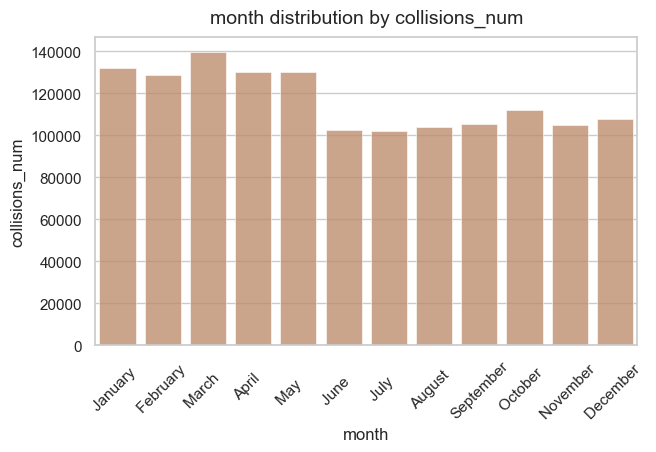

In [20]:
analyze_data(
    data=sql_query(
        """
        SELECT
            month,
            collisions_num
        FROM (
            SELECT
                EXTRACT(MONTH FROM collision_date) AS month_num,
                to_char(collision_date, 'Month') AS month, 
                COUNT(*) AS collisions_num
            FROM 
                collisions
            GROUP BY
                month_num,
                to_char(collision_date, 'Month')
            ORDER BY
                month_num ASC
        ) AS t;
        """
    ),
    x="month", y="collisions_num",
    figsize=(7, 4)
)

#### День недели

Query completed for 00:00:01


Visualization of categorical data



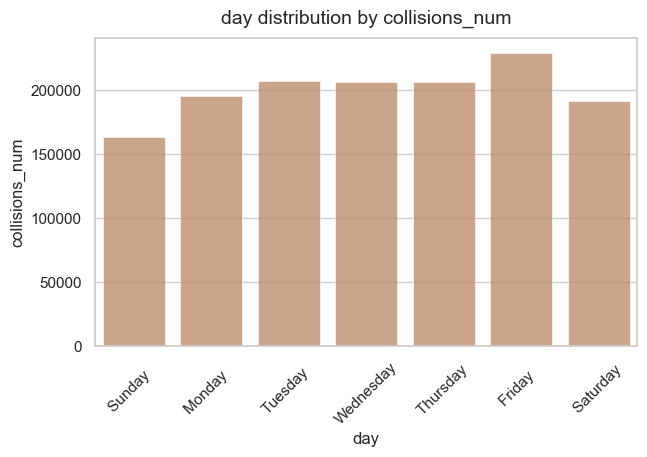

In [21]:
analyze_data(
    data=sql_query(
        """
        SELECT
            day,
            collisions_num
        FROM (
            SELECT
                EXTRACT(DOW FROM collision_date) AS day_num,
                to_char(collision_date, 'Day') AS day, 
                COUNT(*) AS collisions_num
            FROM 
                collisions
            GROUP BY
                day_num,
                to_char(collision_date, 'Day')
            ORDER BY
                day_num ASC
        ) AS t;
        """
    ),
    x="day", y="collisions_num",
    figsize=(7, 4)
)

#### Час

Query completed for 00:00:00


Visualization of categorical data



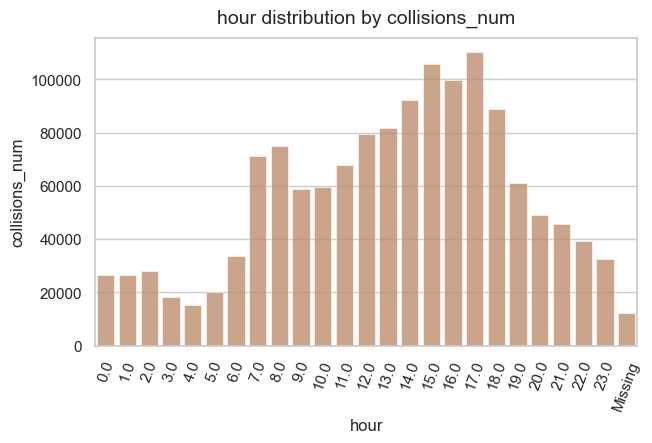

In [22]:
analyze_data(
    data=sql_query(
        """
        SELECT
            EXTRACT(HOUR FROM collision_time)::integer AS hour,
            COUNT(*) AS collisions_num
        FROM 
            collisions
        GROUP BY
            hour
        """
    ),
    x="hour", y="collisions_num",
    rotation=70,
    figsize=(7, 4)
)

### Серьезность происшествия и трезвость виновников

Query completed for 00:00:04


Visualization of categorical data



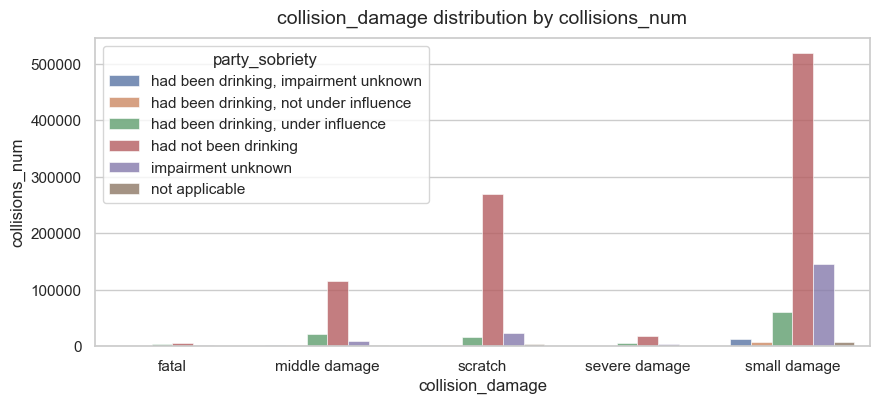

In [23]:
analyze_data(
    data=sql_query(
        """
        SELECT 
            c.collision_damage, 
            p.party_sobriety, 
            COUNT(*) AS collisions_num
        FROM 
            parties p
            LEFT JOIN collisions c ON p.case_id = c.case_id
        WHERE
            p.at_fault = 1
        GROUP BY 
            c.collision_damage, 
            p.party_sobriety;
        """
    ),
    x="collision_damage", y="collisions_num", hue="party_sobriety",
    rotation=0,
    figsize=(10, 4)
)

### Серьезность происшествия и средний возраст автомобиля

Query completed for 00:00:01


Visualization of categorical data



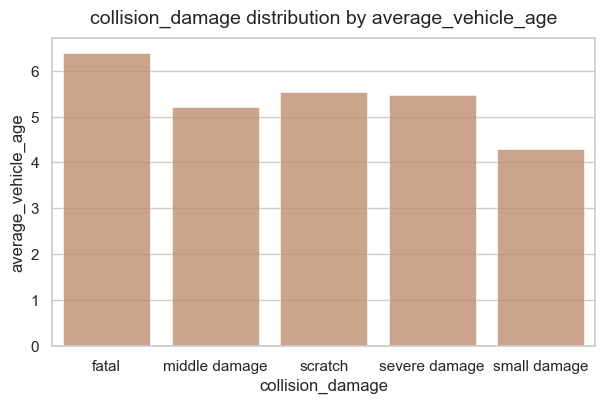

In [24]:
analyze_data(
    data=sql_query(
        """
        SELECT 
            c.collision_damage, 
            avg(v.vehicle_age) as average_vehicle_age 
        FROM 
            collisions c 
            left join vehicles v on c.case_id = v.case_id 
        GROUP BY 
            c.collision_damage
        """
    ),
    x="collision_damage", y="average_vehicle_age",
    rotation=0,
    figsize=(7, 4)
)

# Создайте модель для оценки водительского риска

In [14]:
# Parameters not included in the dataset due to data leakage
leakages = [
    # collisions
    "collision_damage", "party_count", "primary_collision_factor",
    "pcf_violation_category", "type_of_collision",
    "motor_vehicle_involved_with",

    # parties
    "party_number", "party_sobriety", "party_drug_physical"
]


# Dataset flags
collisions_flags = ["collision_date", "collision_damage"]
parties_flags = ["party_type"]


# Potential dataset features
collisions_features = [
    "collision_date", "collision_time", "county_city_location",
    "county_location", "distance", "direction", "intersection", "weather_1",
    "location_type", "road_surface", "road_condition_1", "lighting",
    "control_device"
]
parties_features = ["at_fault", "insurance_premium", "cellphone_in_use"]
vehicles_features = ["vehicle_type", "vehicle_transmission", "vehicle_age"]

In [15]:
dds = sql_query(
    f"""
    SELECT
        {", ".join("c." + el for el in collisions_features)},
        {", ".join("p." + el for el in parties_features)},
        {", ".join("v." + el for el in vehicles_features)}
    FROM
        parties AS p
        LEFT JOIN collisions AS c ON p.case_id = c.case_id
        LEFT JOIN vehicles AS v ON p.case_id = v.case_id
    WHERE
        {"c." + collisions_flags[0]}::DATE {DATE_FLAG}
        AND {"c." + collisions_flags[1]} {COLLISION_TYPE_FLAG}
        AND {"p." + parties_flags[0]} {VEHICLE_TYPE_FLAG};
    """
)

print("Dataset sketch sample:")
display(dds.head())
print()
df_quik_view(dds)

Query completed for 00:00:52


Dataset sketch sample:


,collision_date,collision_time,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,road_surface,road_condition_1,lighting,control_device,at_fault,insurance_premium,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age
0,2012-02-17,04:38:00,1942,los angeles,5.0,south,0.0,clear,highway,dry,normal,dark with street lights,none,0,44.0,0.0,hatchback,auto,2.0
1,2012-01-24,16:20:00,0100,alameda,1056.0,north,0.0,clear,highway,dry,normal,daylight,none,1,21.0,0.0,None,None,NaN
2,2012-01-24,16:20:00,0100,alameda,1056.0,north,0.0,clear,highway,dry,normal,daylight,none,0,59.0,0.0,None,None,NaN
3,2012-02-01,09:26:00,4006,san luis obispo,60.0,south,0.0,clear,None,dry,normal,daylight,functioning,0,63.0,0.0,coupe,auto,10.0
4,2012-01-30,09:30:00,1932,los angeles,400.0,east,0.0,clear,highway,dry,normal,daylight,none,1,33.0,0.0,None,None,NaN



General data analysis:

Shape of the table:      (226984, 19)
Duplicates in the table: 2397, (1.06%)
Memory usage:            345.0+ MB



Completed for 00:00:08


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
collision_date,226984,0,100.000000,366,"[2012-12-31, 2012-12-30, 2012-12-29, 2012-12-2...",object
collision_time,225598,1386,99.389384,1440,"[23:59:00, 23:58:00, 23:57:00, 23:56:00, 23:55...",object
county_city_location,226984,0,100.000000,513,"[5802, 5801, 5800, 5704, 5703, 5702, 5701, 570...",object
county_location,226984,0,100.000000,58,"[yuba, yolo, ventura, tuolumne, tulare, trinit...",object
distance,226984,0,100.000000,2321,"[1584000.0, 792000.0, 549120.0, 528000.0, 3168...",float64
direction,175734,51250,77.421316,4,"[west, south, north, east, None]",object
intersection,225895,1089,99.520231,2,"[1.0, 0.0, nan]",float64
weather_1,226205,779,99.656804,7,"[wind, snowing, raining, other, fog, cloudy, c...",object
location_type,101712,125272,44.810207,3,"[ramp, intersection, highway, None]",object
road_surface,225492,1492,99.342685,4,"[wet, snowy, slippery, dry, None]",object


In [16]:
dds["collision_date"] = pd.to_datetime(dds["collision_date"])
dds["collision_time"] = pd.to_datetime(
    dds["collision_time"], format='%H:%M:%S').dt.hour

dtypes = {
    "collision_time":           "float32",
    "county_city_location":     "category",
    "county_location":          "category",
    "distance":                 "float32",
    "direction":                "category",
    "intersection":             "category",
    "weather_1":                "category",
    "location_type":            "category",
    "road_surface":             "category",
    "road_condition_1":         "category",
    "lighting":                 "category",
    "control_device":           "category",
    "at_fault":                 "int8",
    "insurance_premium":        "float32",
    "cellphone_in_use":         "category",
    "vehicle_type":             "category",
    "vehicle_transmission":     "category",
    "vehicle_age":              "float32"
}

dds = change_dtypes(dds, **dtypes)
df_quik_view(dds)

Initial value of memory usage:                  34501568
Value of memory usage after changing data types: 8877860

Memory usage reduced by 74.27% 

General data analysis:

Shape of the table:      (226984, 19)
Duplicates in the table: 2445, (1.08%)
Memory usage:            88.8+ MB



Completed for 00:00:00


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
collision_date,226984,0,100.000000,366,"[2012-12-31T00:00:00.000000000, 2012-12-30T00:...",datetime64[ns]
collision_time,225598,1386,99.389384,24,"[23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16....",float32
county_city_location,226984,0,100.000000,513,"['5802', '5801', '5800', '5704', '5703', ..., ...",category
county_location,226984,0,100.000000,58,"['yuba', 'yolo', 'ventura', 'tuolumne', 'tular...",category
distance,226984,0,100.000000,2321,"[1584000.0, 792000.0, 549120.0, 528000.0, 3168...",float32
direction,175734,51250,77.421316,4,"['west', 'south', 'north', 'east', NaN] Catego...",category
intersection,225895,1089,99.520231,2,"[1.0, 0.0, NaN] Categories (2, float64): [0.0,...",category
weather_1,226205,779,99.656804,7,"['wind', 'snowing', 'raining', 'other', 'fog',...",category
location_type,101712,125272,44.810207,3,"['ramp', 'intersection', 'highway', NaN] Categ...",category
road_surface,225492,1492,99.342685,4,"['wet', 'snowy', 'slippery', 'dry', NaN] Categ...",category


## at_fault

Visualization of target distribution:

Target: at_fault


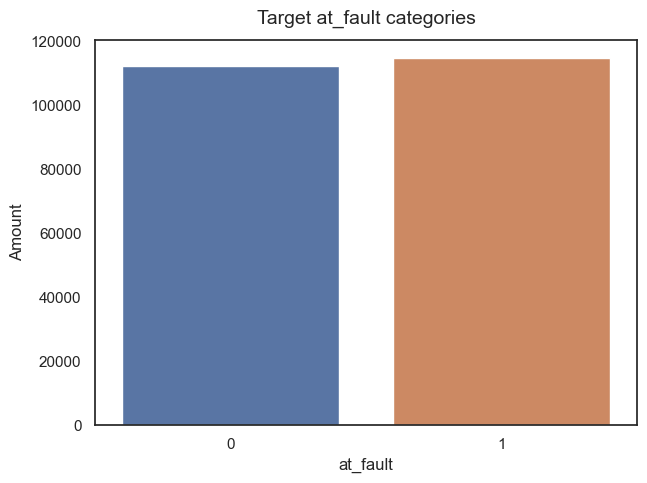


Target statistics:


,at_fault
count,226984.000000
mean,0.505652
std,0.499969
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [28]:
create_visualization(data=dds,
                     dtype="target", target="at_fault",
                     is_cat_target=True, figsize=(7, 5))

## collision_date

Visualization of categorical features and target prevalence:

Feature: collision_month


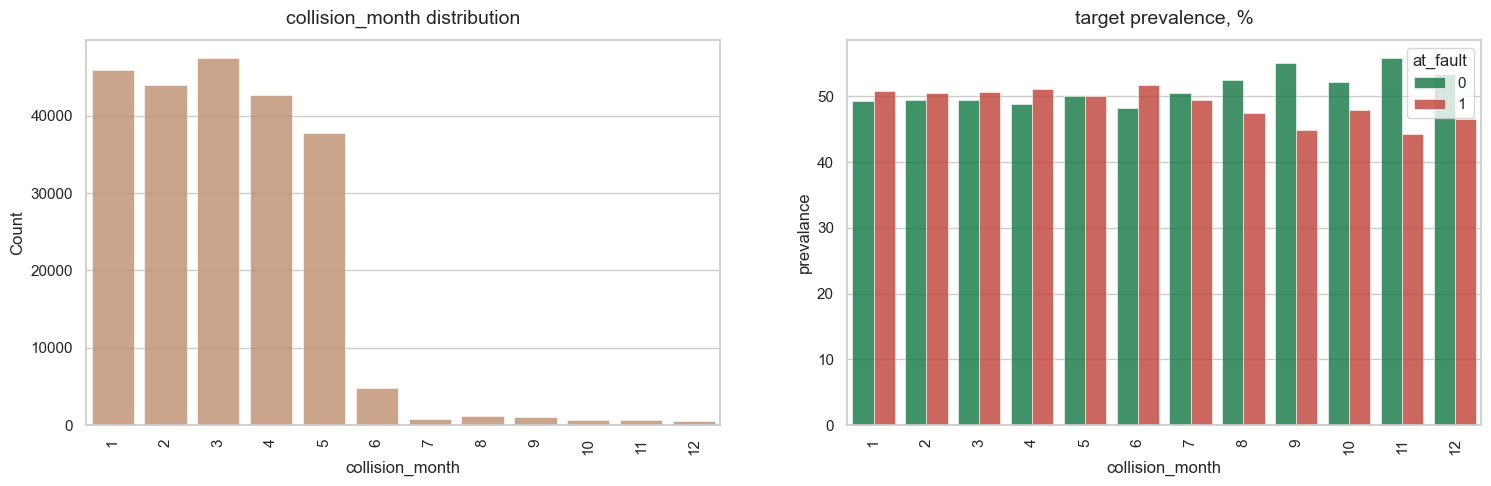

In [29]:
dds_temp = dds[["collision_date", "at_fault"]].copy()
dds_temp["collision_date"] = dds_temp["collision_date"].dt.month
dds_temp = dds_temp.rename(columns={"collision_date": "collision_month"})

create_visualization(data=dds_temp,
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

del dds_temp

Visualization of categorical features and target prevalence:

Feature: day_of_week


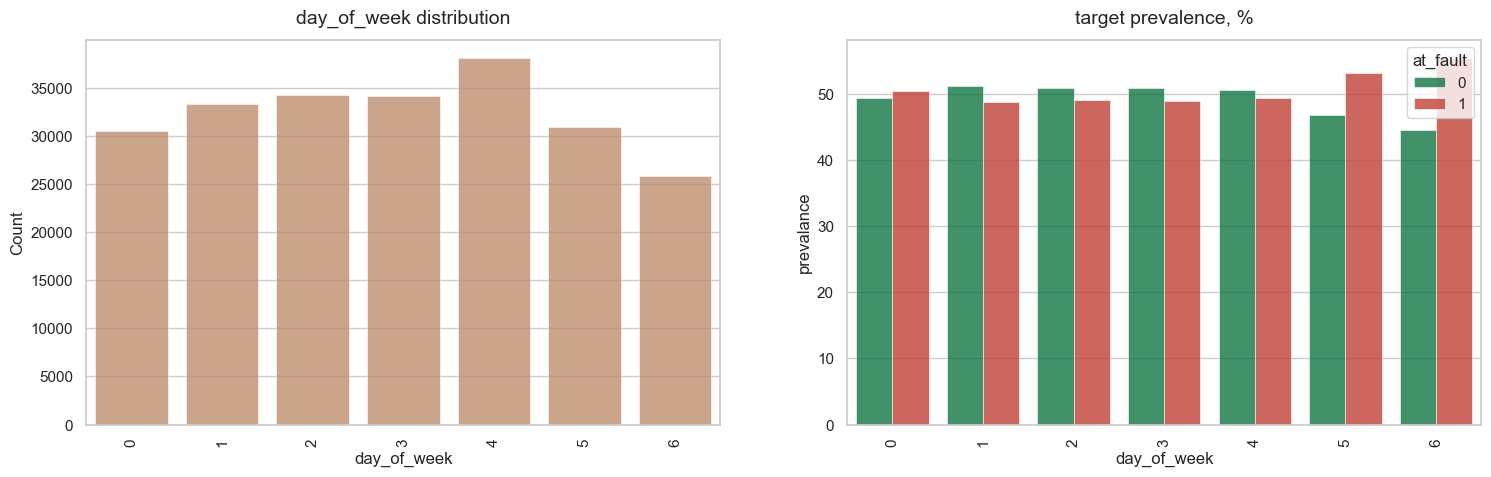

In [30]:
dds_temp = dds[["collision_date", "at_fault"]].copy()
dds_temp["collision_date"] = dds_temp["collision_date"].dt.day_of_week
dds_temp = dds_temp.rename(columns={"collision_date": "day_of_week"})

create_visualization(data=dds_temp,
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

del dds_temp

## collision_time

Visualization of categorical features and target prevalence:

Feature: collision_time


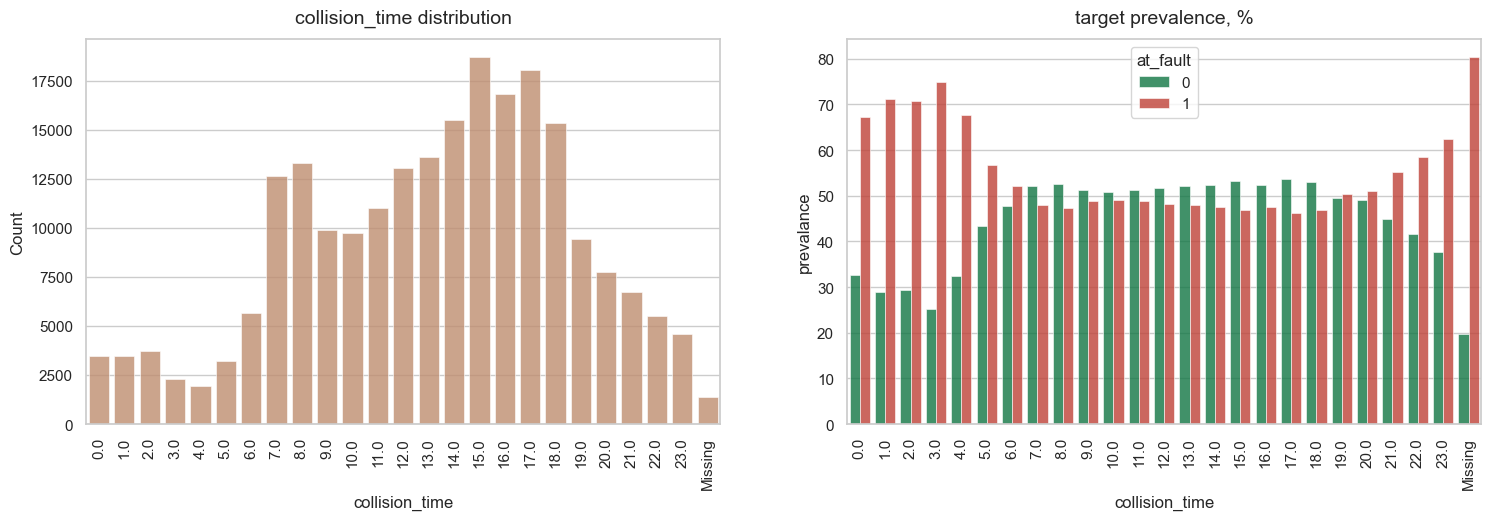

In [31]:
dds_temp = dds[["collision_time", "at_fault"]].copy()
dds_temp["collision_time"] = dds_temp["collision_time"].astype("category")

create_visualization(data=dds_temp,
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

del dds_temp

Visualization of categorical features and target prevalence:

Feature: collision_time


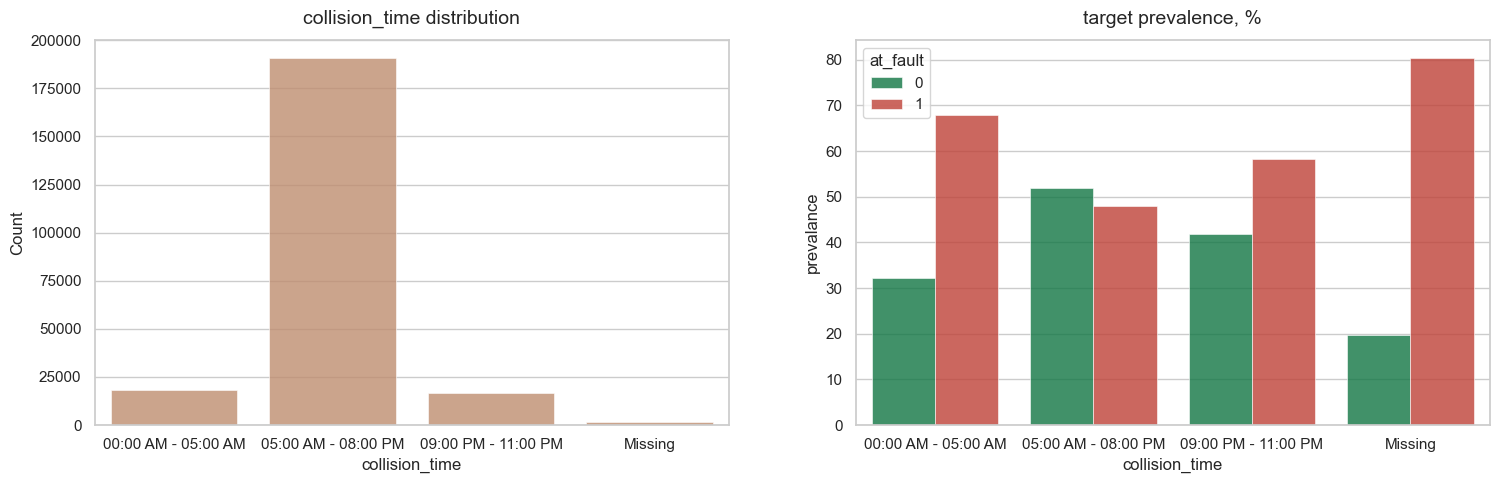

In [32]:
dds_temp = dds[["collision_time", "at_fault"]].copy()
dds_temp["collision_time"] = (dds_temp["collision_time"]
                              .apply(lambda x: 1 if x < 6 else x)
                              .apply(lambda x: 2 if x > 5 and x < 21 else x)
                              .apply(lambda x: 3 if x > 20 else x)
                              .fillna("Missing")
                              .replace(1, "00:00 AM - 05:00 AM")
                              .replace(2, "05:00 AM - 08:00 PM")
                              .replace(3, "09:00 PM - 11:00 PM"))

create_visualization(data=dds_temp,
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

del dds_temp

## county_city_location

Visualization of categorical features and target prevalence:

Feature: county_city_location


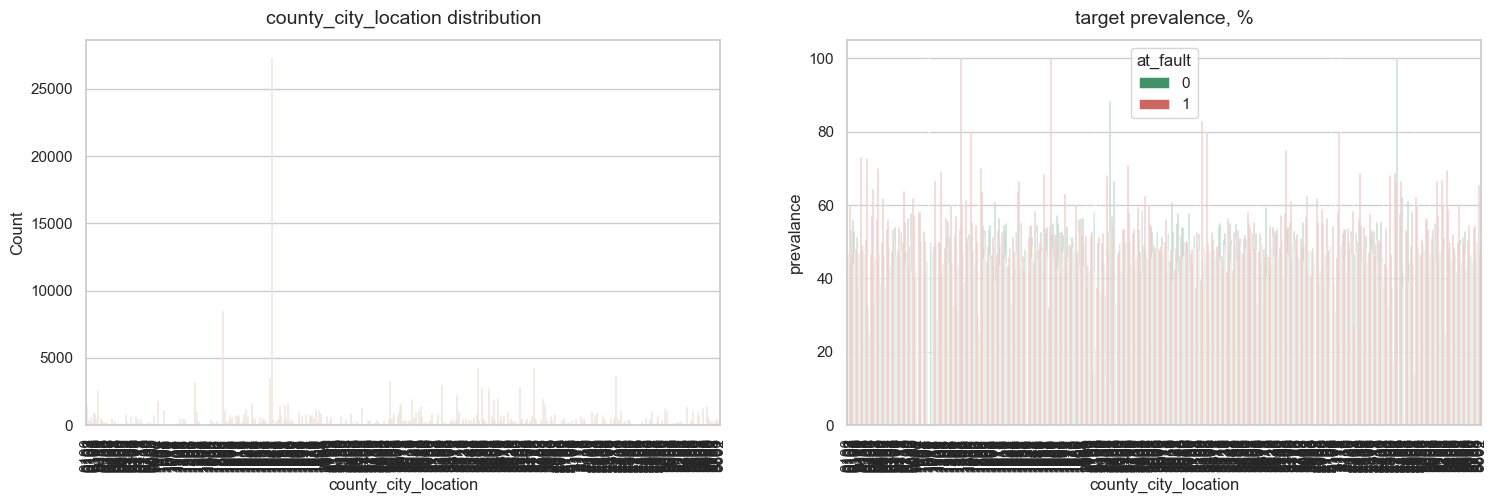

In [33]:
create_visualization(data=dds[["county_city_location", "at_fault"]],
                     dtype="categories", target="at_fault", 
                     is_cat_target=True)

## county_location

Visualization of categorical features and target prevalence:

Feature: county_location


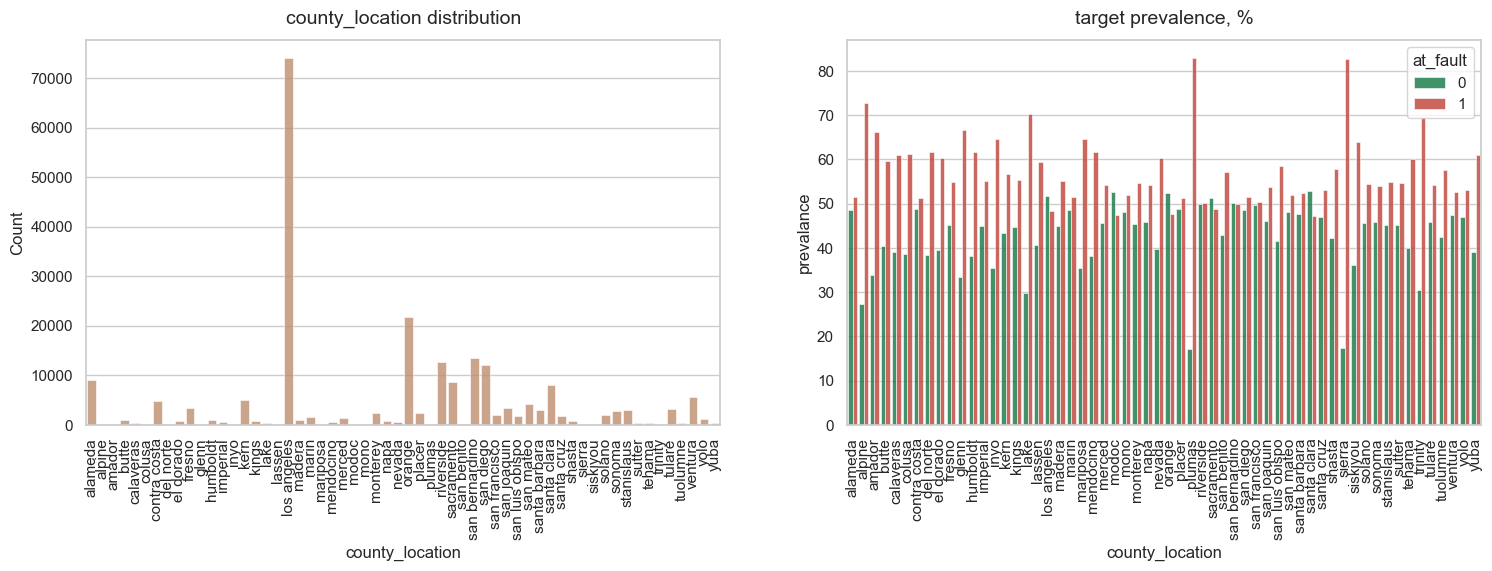

In [34]:
create_visualization(data=dds[["county_location", "at_fault"]],
                     dtype="categories", target="at_fault", 
                     is_cat_target=True)

## distance

Visualization of quantitative features distribution:

Feature: distance


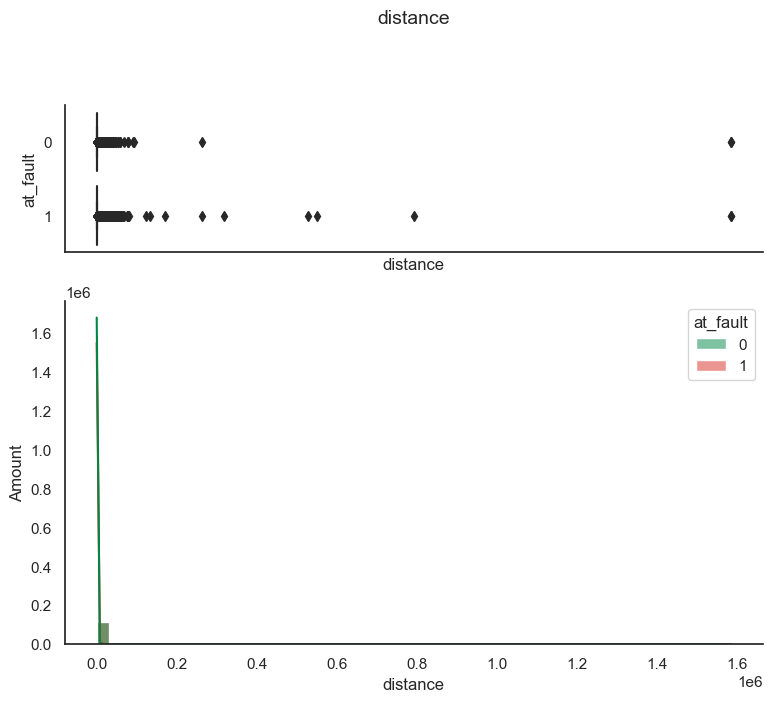


Feature statistics:


,distance
count,226984.00
mean,662.97
std,7393.83
min,0.00
25%,10.00
50%,100.00
75%,500.00
max,1584000.00


In [35]:
create_visualization(data=dds[["distance", "at_fault"]],
                     dtype="scalars", target="at_fault",
                     is_cat_target=True)

Visualization of quantitative features distribution:

Feature: distance


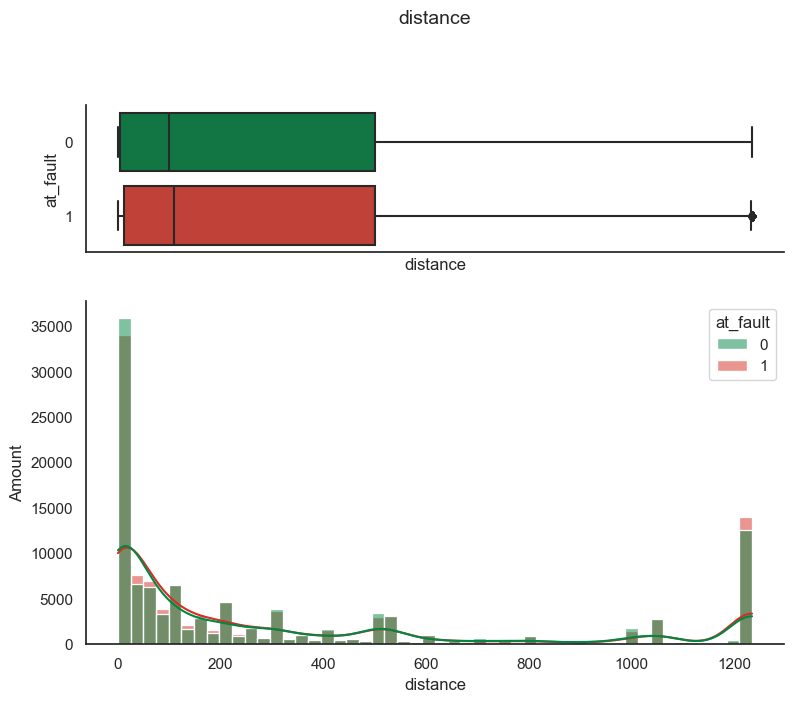


Feature statistics:


,distance
count,226984.00
mean,329.39
std,426.52
min,0.00
25%,10.00
50%,100.00
75%,500.00
max,1235.00


In [36]:
dds_temp = dds[["distance", "at_fault"]].copy()
dds_temp["distance"] = remove_outs(dds_temp, "distance", False)

create_visualization(data=dds_temp[["distance", "at_fault"]],
                     dtype="scalars", target="at_fault",
                     is_cat_target=True)

del dds_temp

## direction

Visualization of categorical features and target prevalence:

Feature: direction


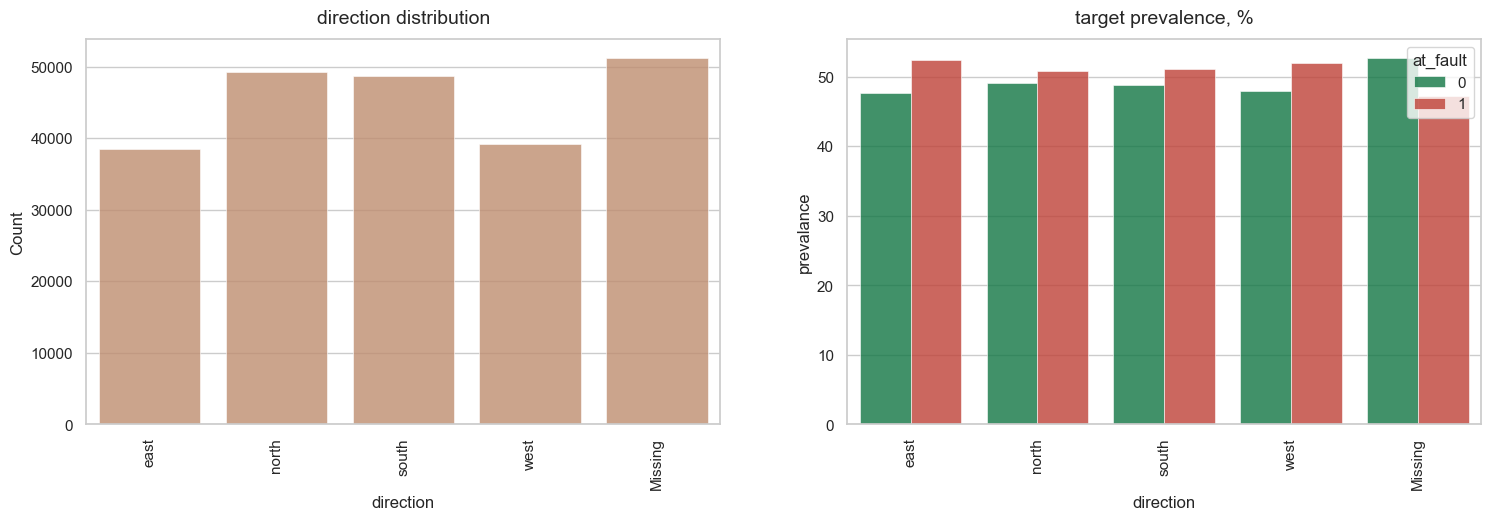

In [37]:
create_visualization(data=dds[["direction", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

## intersection

Visualization of categorical features and target prevalence:

Feature: intersection


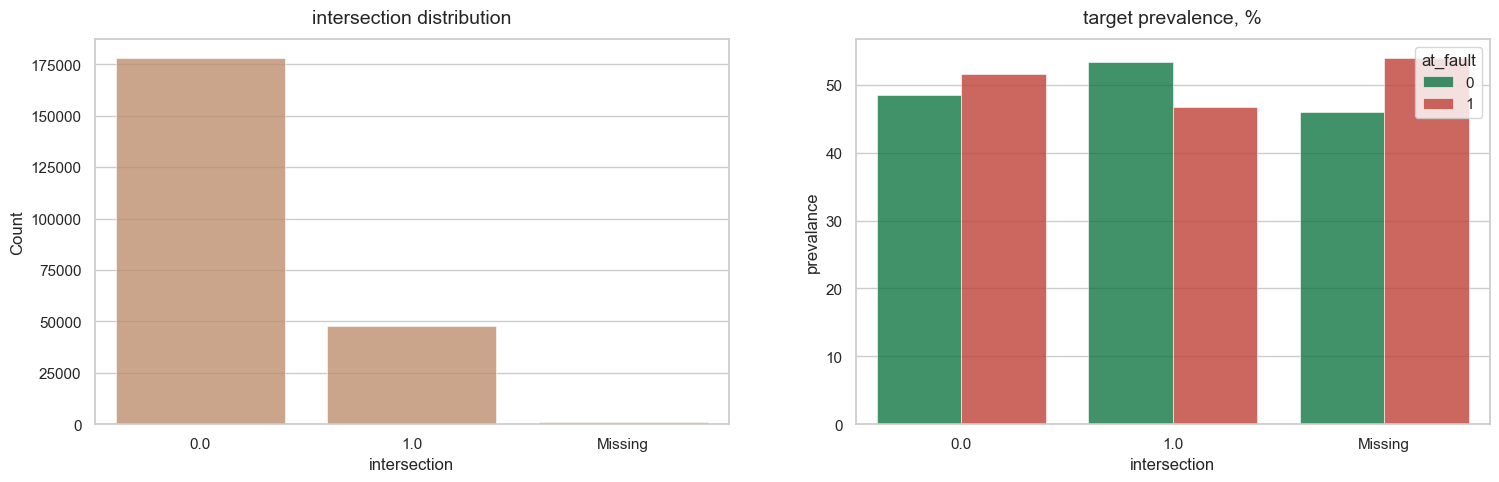

In [38]:
create_visualization(data=dds[["intersection", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

## weather_1

Visualization of categorical features and target prevalence:

Feature: weather_1


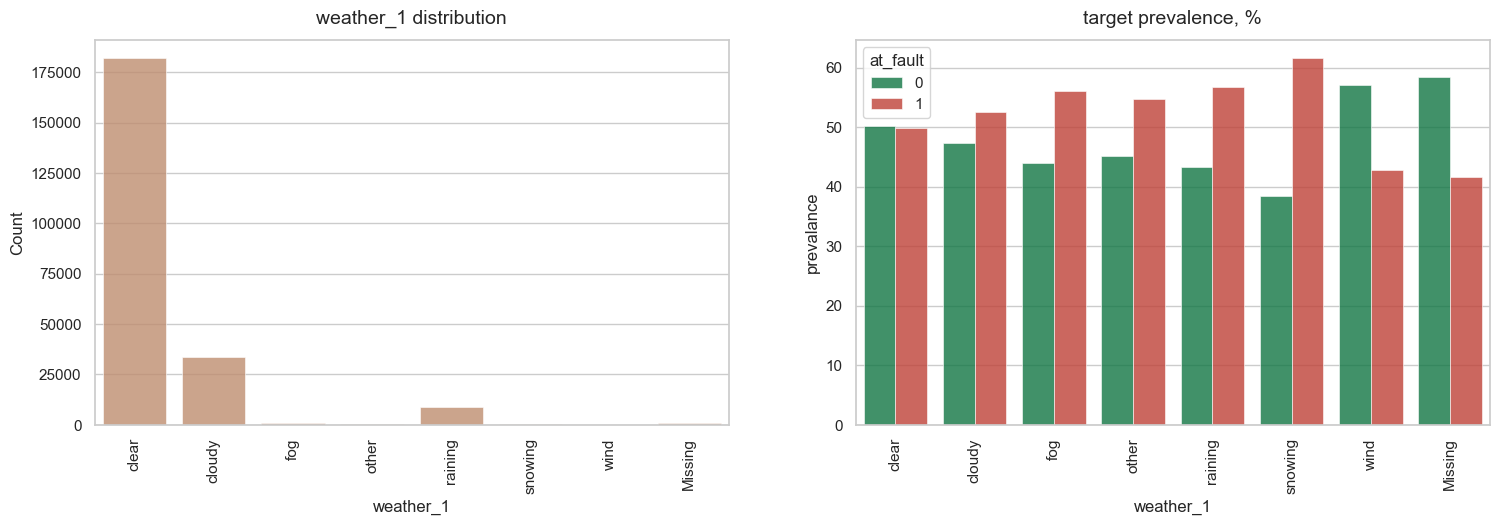

In [39]:
create_visualization(data=dds[["weather_1", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

## location_type

Visualization of categorical features and target prevalence:

Feature: location_type


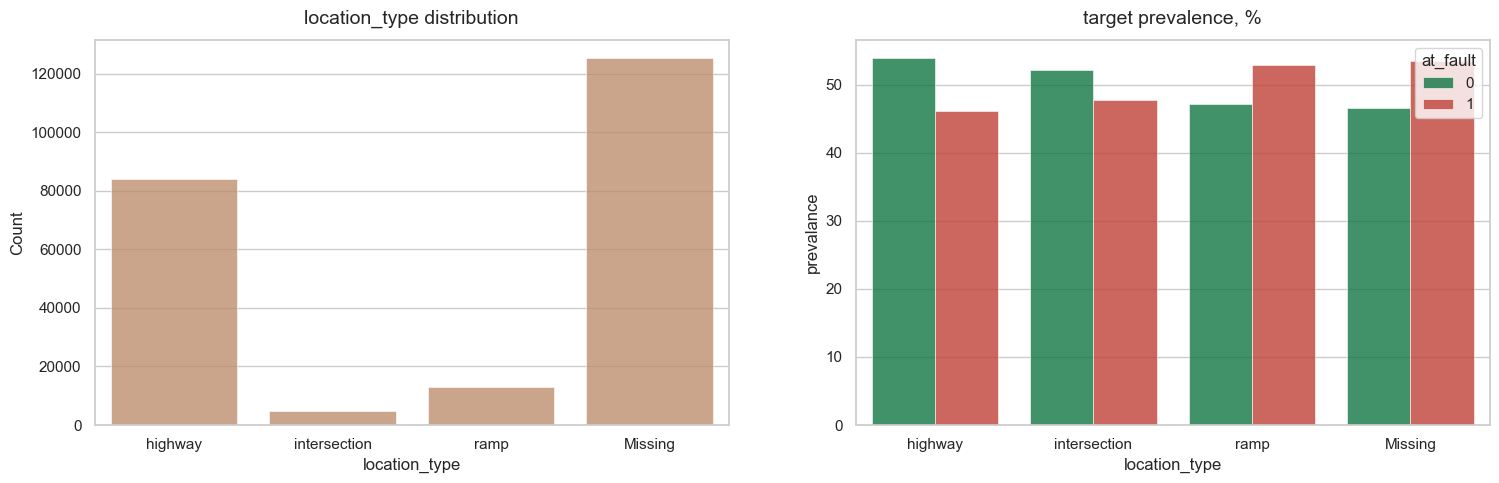

In [40]:
create_visualization(data=dds[["location_type", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

## road_surface

Visualization of categorical features and target prevalence:

Feature: road_surface


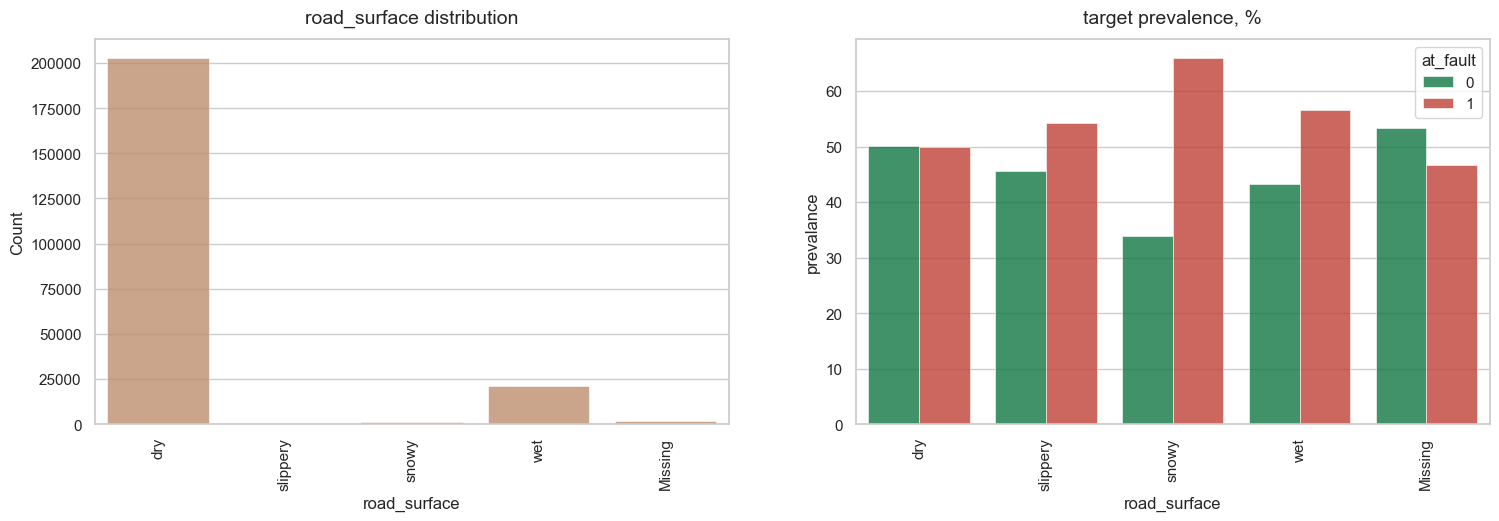

In [41]:
create_visualization(data=dds[["road_surface", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

## road_condition_1

Visualization of categorical features and target prevalence:

Feature: road_condition_1


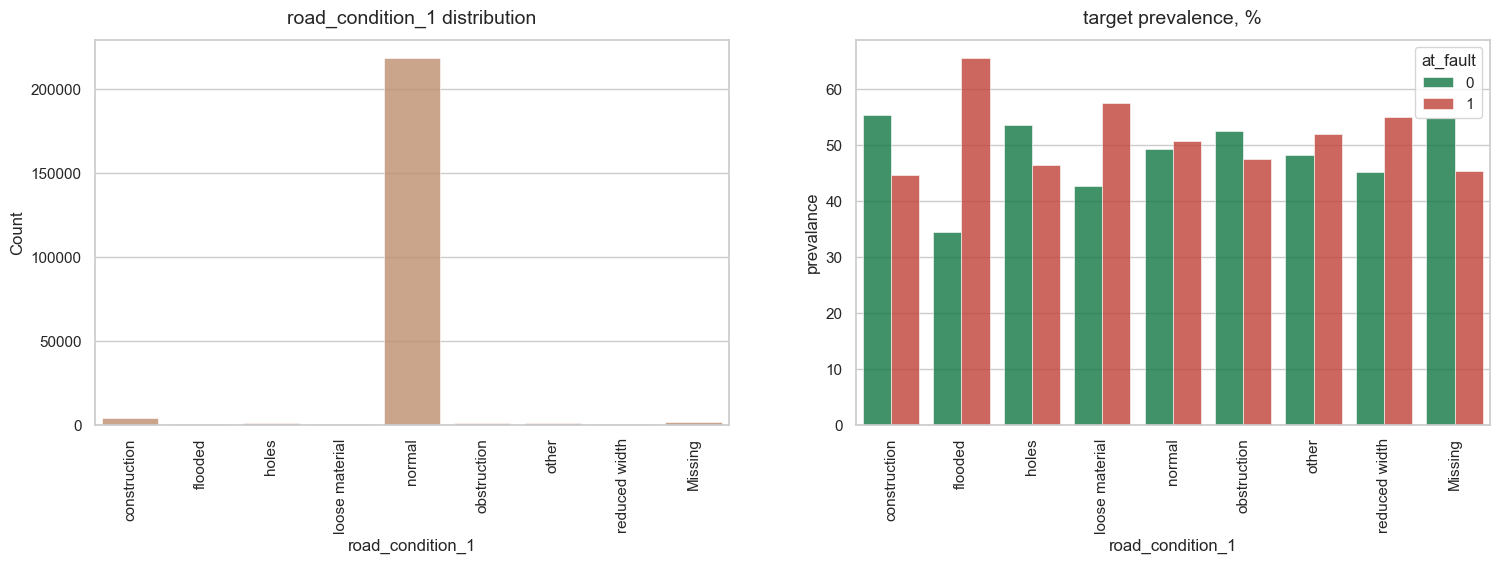

In [42]:
create_visualization(data=dds[["road_condition_1", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

## lighting

Visualization of categorical features and target prevalence:

Feature: lighting


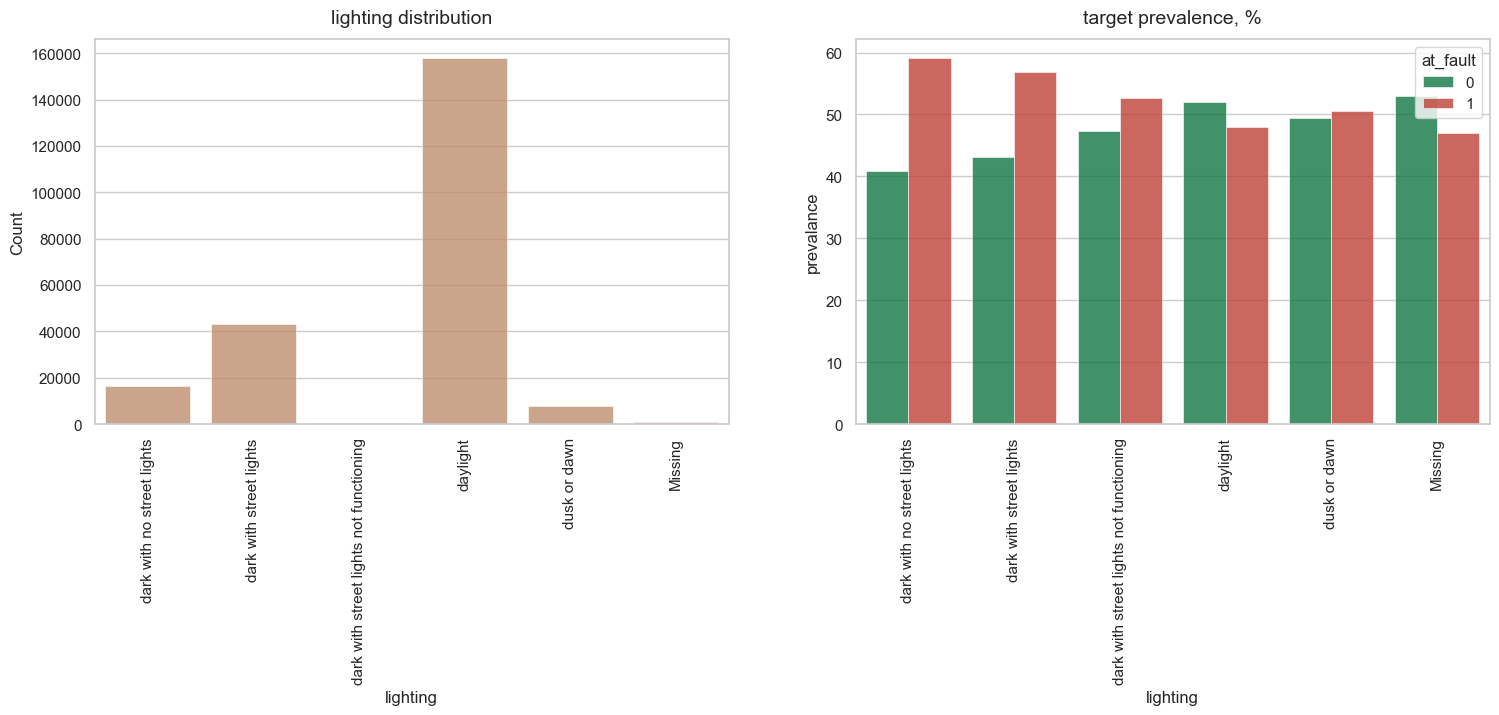

In [43]:
create_visualization(data=dds[["lighting", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

## control_device

Visualization of categorical features and target prevalence:

Feature: control_device


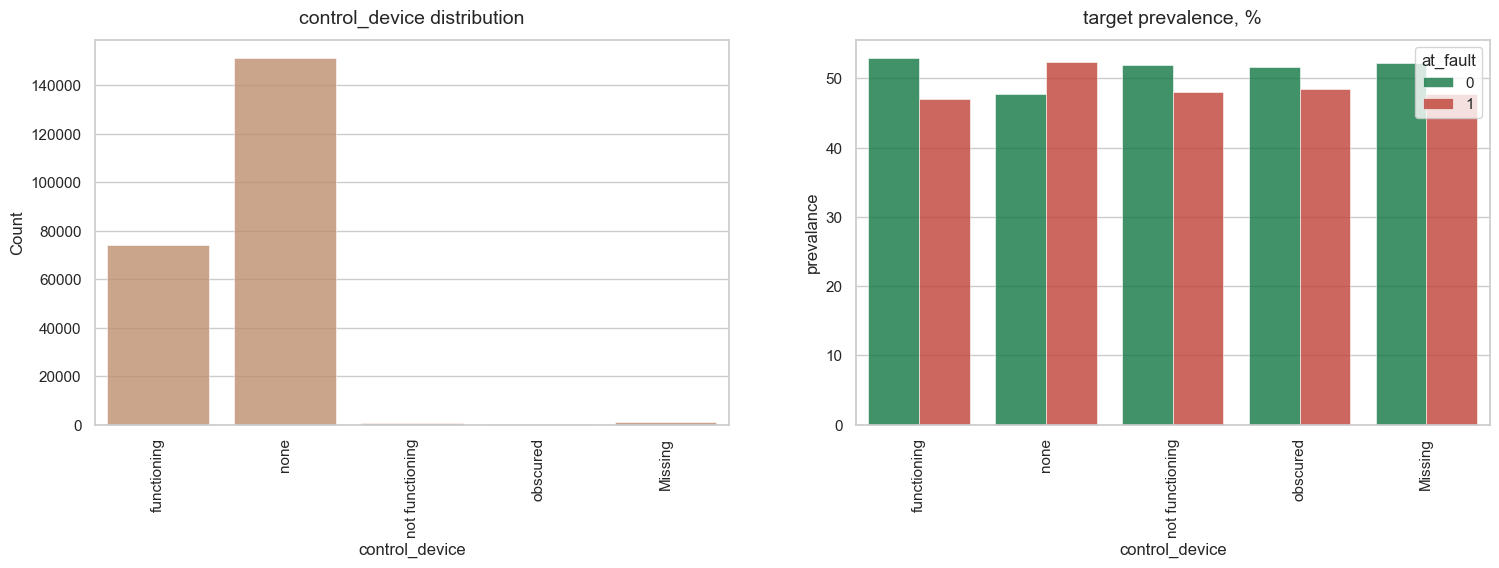

In [44]:
create_visualization(data=dds[["control_device", "at_fault"]],
                     dtype="categories", target="at_fault", 
                     is_cat_target=True)

## insurance_premium

Visualization of quantitative features distribution:

Feature: insurance_premium


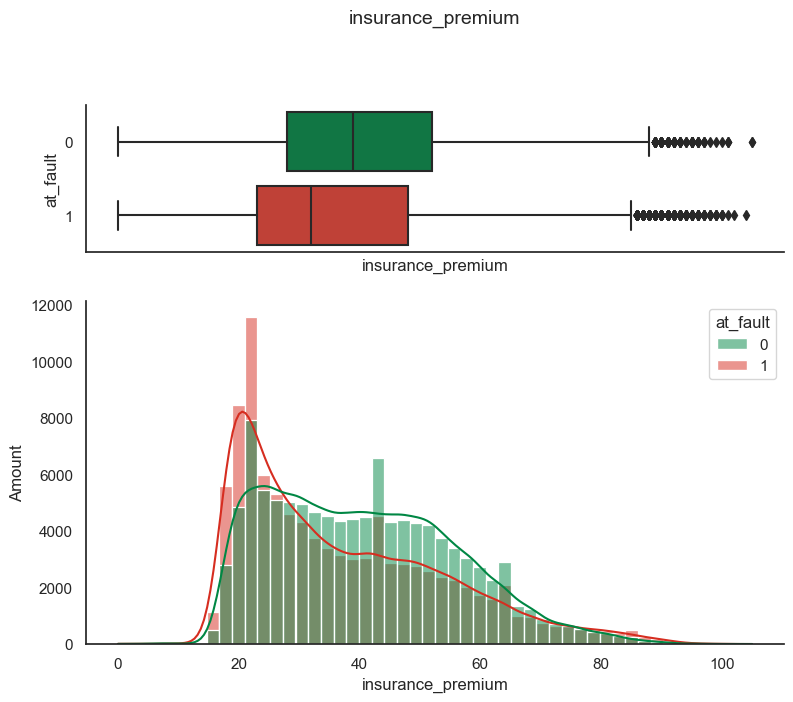


Feature statistics:


,insurance_premium
count,206289.00
mean,38.94
std,16.24
min,0.00
25%,25.00
50%,36.00
75%,50.00
max,105.00


In [45]:
create_visualization(data=dds[["insurance_premium", "at_fault"]],
                     dtype="scalars", target="at_fault", 
                     is_cat_target=True)

Visualization of quantitative features distribution:

Feature: insurance_premium


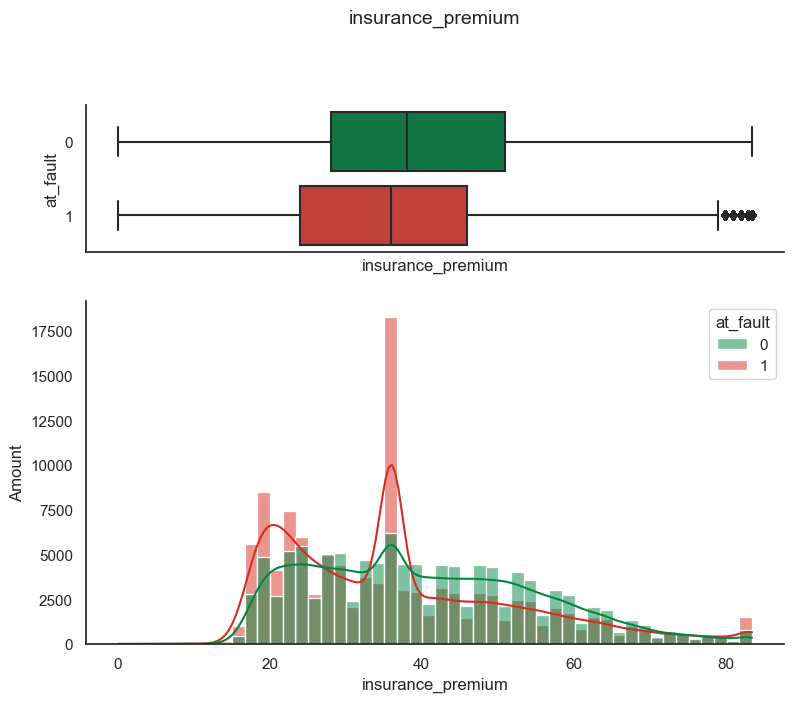


Feature statistics:


,insurance_premium
count,226984.00
mean,38.64
std,15.41
min,0.00
25%,26.00
50%,36.00
75%,49.00
max,83.50


In [46]:
dds_temp = dds[["insurance_premium", "at_fault"]].copy()
dds_temp["insurance_premium"] = dds_temp["insurance_premium"].fillna(
    dds_temp["insurance_premium"].median())
dds_temp["insurance_premium"] = remove_outs(
    dds_temp, "insurance_premium", False)

create_visualization(data=dds_temp,
                     dtype="scalars", target="at_fault", 
                     is_cat_target=True)

del dds_temp

## cellphone_in_use

Visualization of categorical features and target prevalence:

Feature: cellphone_in_use


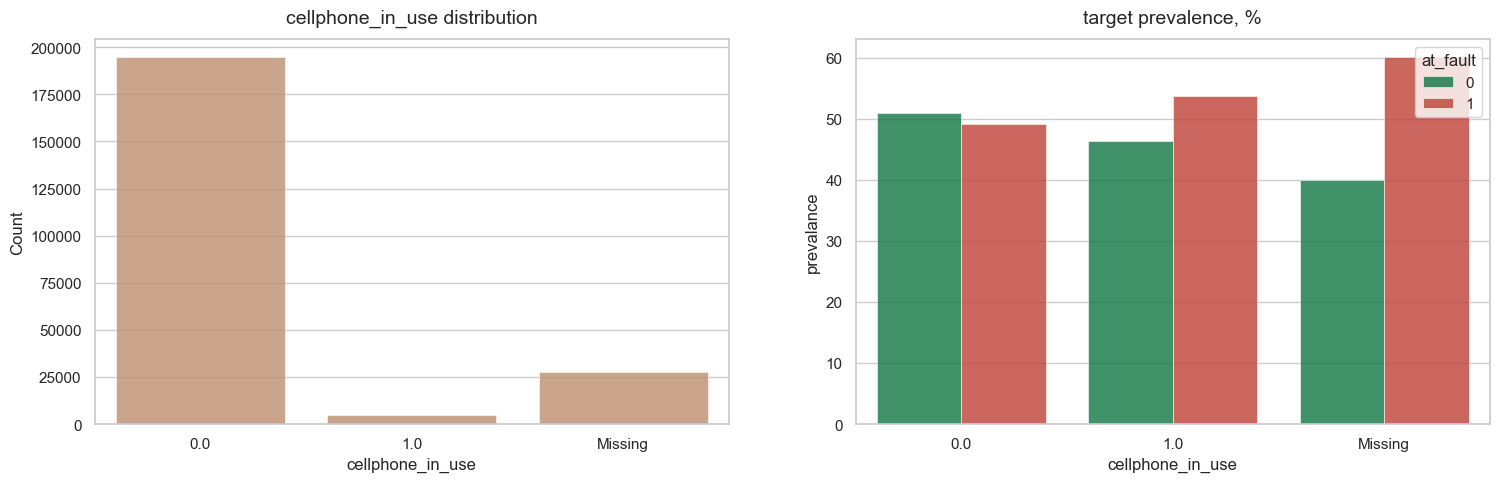

In [47]:
create_visualization(data=dds[["cellphone_in_use", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

## vehicle_type

Visualization of categorical features and target prevalence:

Feature: vehicle_type


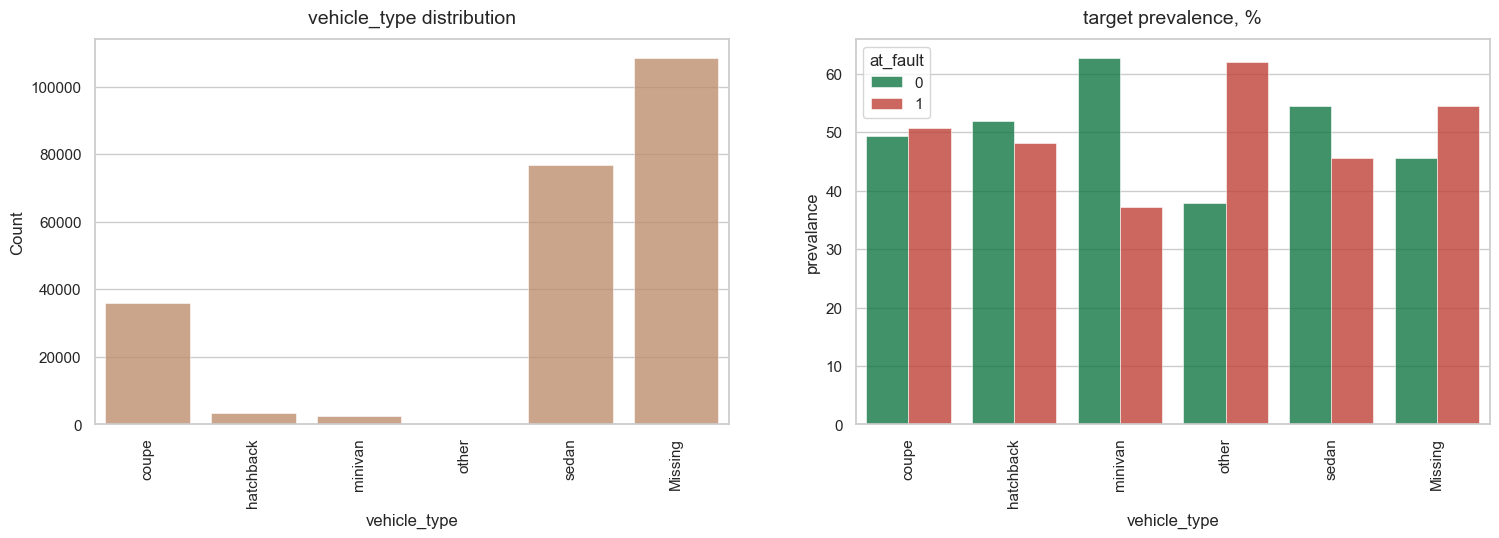

In [48]:
create_visualization(data=dds[["vehicle_type", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

## vehicle_transmission

Visualization of categorical features and target prevalence:

Feature: vehicle_transmission


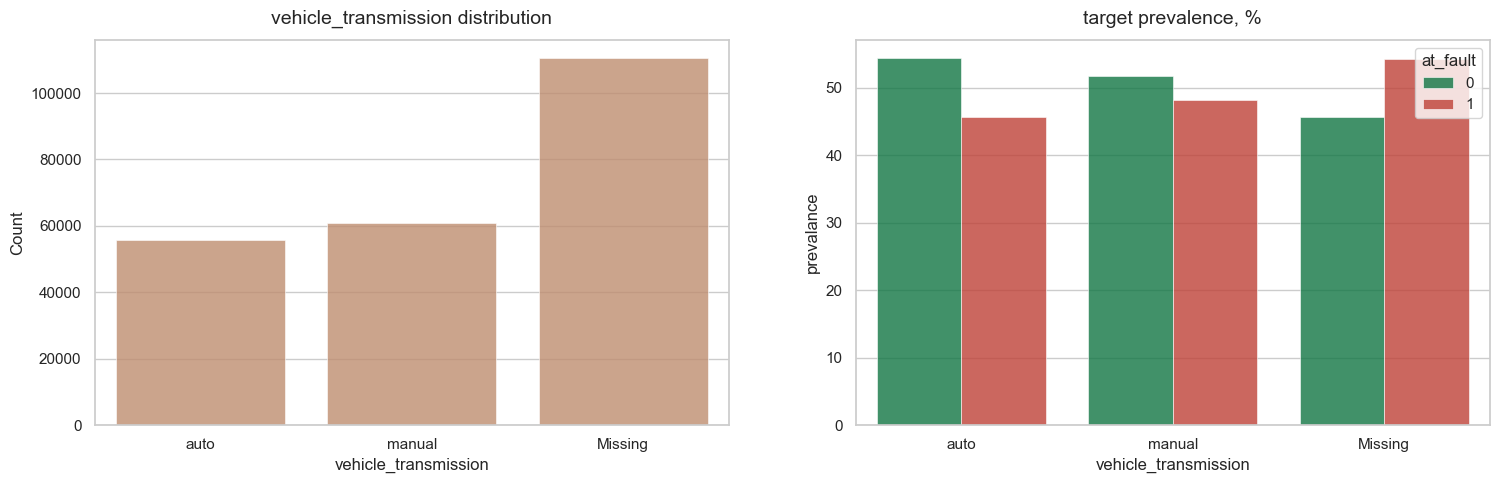

In [49]:
create_visualization(data=dds[["vehicle_transmission", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

## vehicle_age

Visualization of quantitative features distribution:

Feature: vehicle_age


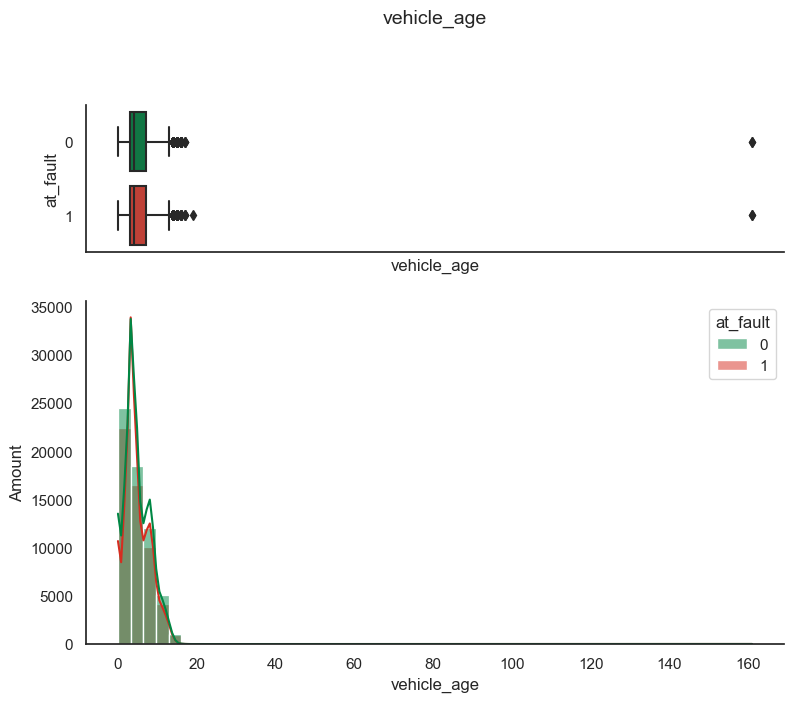


Feature statistics:


,vehicle_age
count,115046.00
mean,4.91
std,3.27
min,0.00
25%,3.00
50%,4.00
75%,7.00
max,161.00


In [50]:
create_visualization(data=dds[["vehicle_age", "at_fault"]],
                     dtype="scalars", target="at_fault",
                     is_cat_target=True)

Visualization of quantitative features distribution:

Feature: vehicle_age


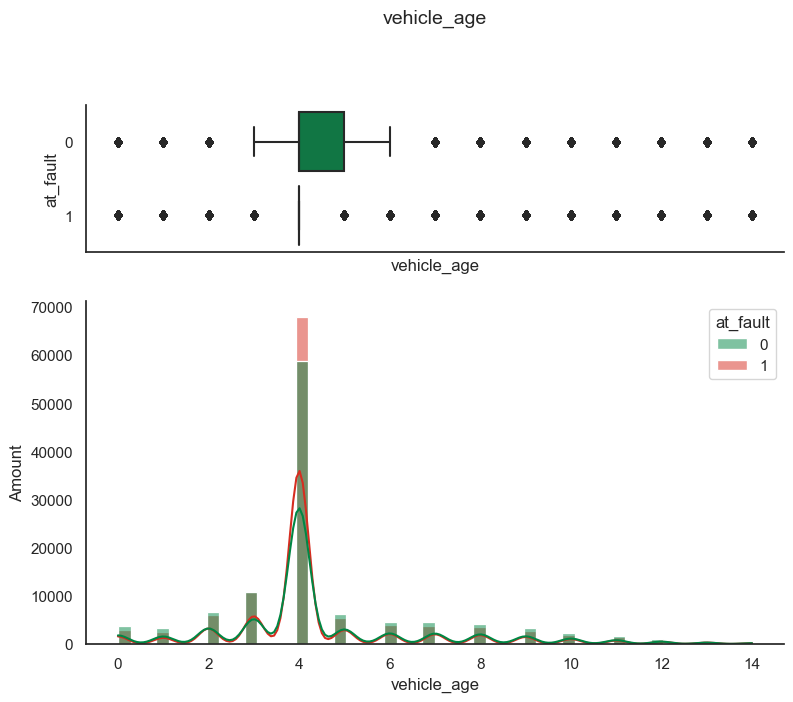


Feature statistics:


,vehicle_age
count,226984.00
mean,4.46
std,2.27
min,0.00
25%,4.00
50%,4.00
75%,4.00
max,14.00


In [51]:
dds_temp = dds[["vehicle_age", "at_fault"]].copy()
dds_temp["vehicle_age"] = dds_temp["vehicle_age"].fillna(dds_temp["vehicle_age"]
                                                         .median())
dds_temp["vehicle_age"] = dds_temp["vehicle_age"].apply(
    lambda x: 14 if x > 14 else x)


create_visualization(data=dds_temp,
                     dtype="scalars", target="at_fault",
                     is_cat_target=True)

del dds_temp

Visualization of categorical features and target prevalence:

Feature: vehicle_age


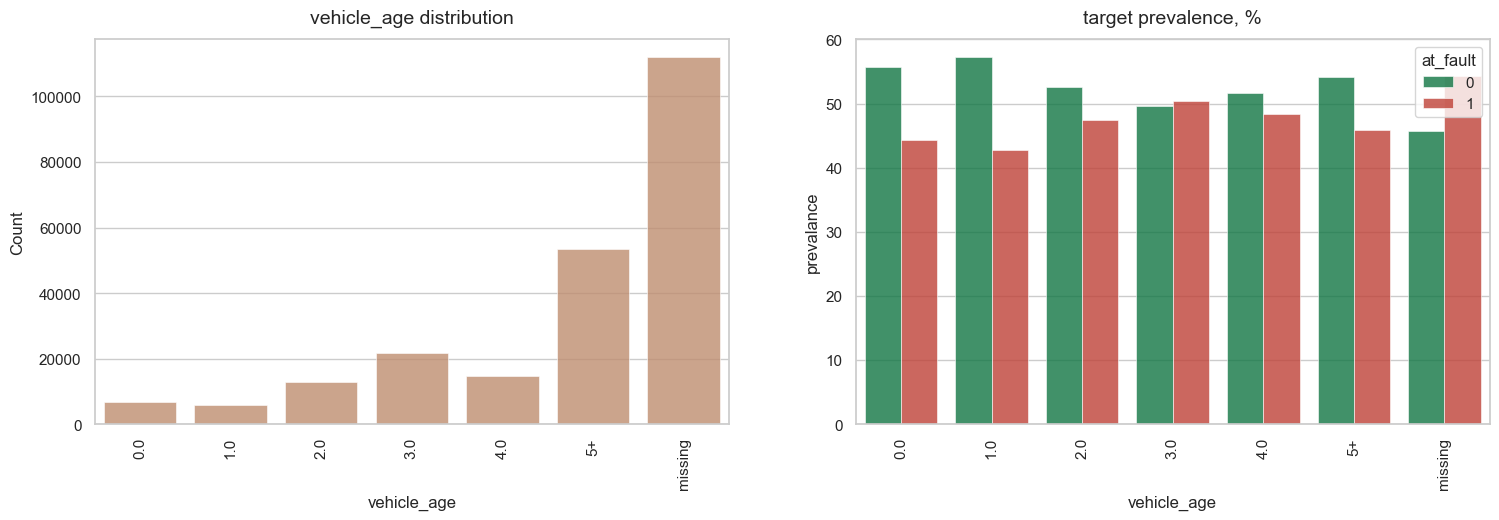

In [52]:
dds_temp = dds[["vehicle_age", "at_fault"]].copy()

dds_temp["vehicle_age"] = (dds_temp["vehicle_age"]
                           .fillna(-1)
                           .astype("object")
                           .apply(lambda x: "5+" if int(x) > 4 else x)
                           .replace(-1, "missing")
                           .astype("category"))

create_visualization(data=dds_temp,
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

del dds_temp

## Корреляционный анализ

Initial value of memory usage:                  8877860
Value of memory usage after changing data types: 10239516

Memory usage reduced by -15.34% 



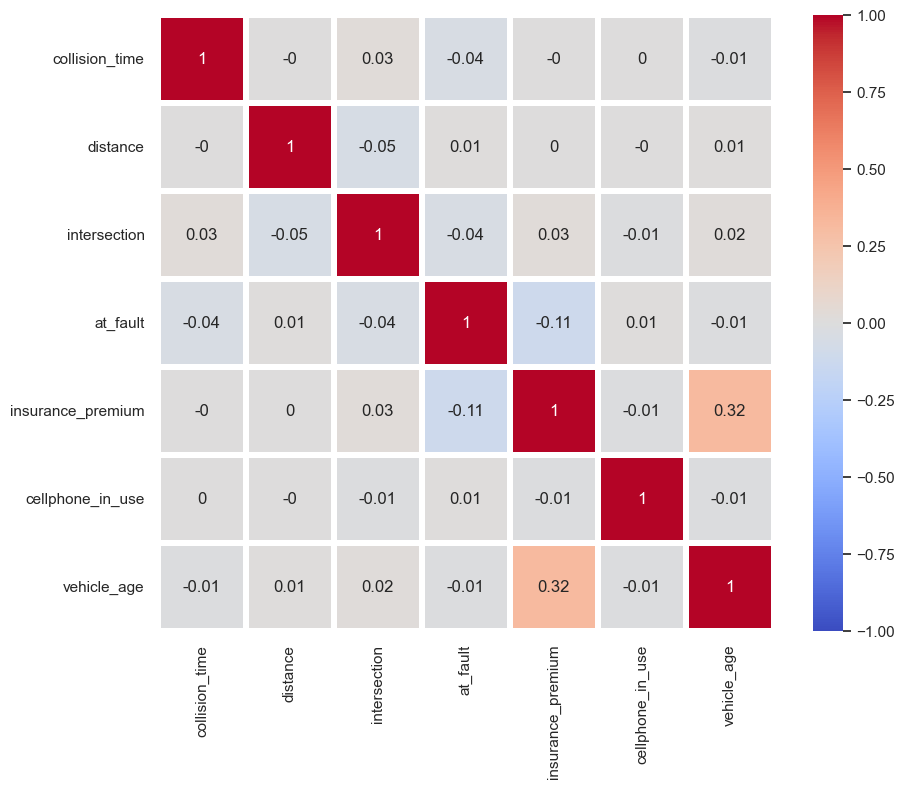

In [53]:
dds_temp = dds.copy()
dds_temp = change_dtypes(dds, **{"intersection": "float32",
                                 "cellphone_in_use": "float32"})

get_corr_map(dds_temp, figisze=(10, 8))

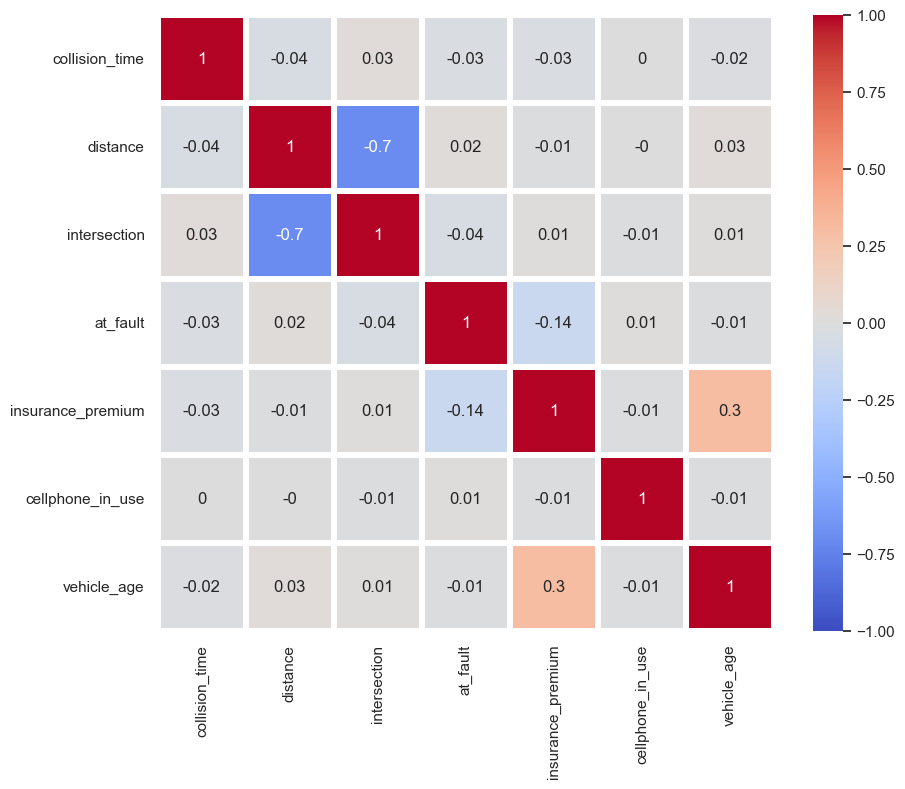

In [54]:
get_corr_map(dds_temp, "spearman", figisze=(10, 8))

del dds_temp

## Сборка датасета

In [17]:
old_shape = dds.shape[0]
ds = pd.DataFrame(
    {
        # Scalar features
        "q_distance":           (remove_outs(dds, "distance", False)
                                 .apply(np.round)
                                 .astype("int16")),
        "q_insurance":          (remove_outs(dds, "insurance_premium", False)
                                 .fillna(dds["insurance_premium"].median())
                                 .apply(np.round)
                                 .astype("int16")),
        
        # Categorical features
        "c_location":           dds["county_location"],
        "c_diraction":          (dds["direction"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_intersection":       (dds["intersection"].cat.
                                 add_categories("missing").fillna("missing")),
        "c_weather_1":          (dds["weather_1"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_location_type":      (dds["location_type"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_road_surface":       (dds["road_surface"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_road_condition_1":   (dds["road_condition_1"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_lighting":           (dds["lighting"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_cellphone_in_use":   (dds["cellphone_in_use"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_vehicle_type":       (dds["vehicle_type"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_transmission":       (dds["vehicle_transmission"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_vehicle_age":        (dds["vehicle_age"]
                                 .fillna(-1)
                                 .astype("object")
                                 .apply(lambda x: "5+" if int(x) > 4 else x)
                                 .astype("category")),

        # Feature engineering
        "c_dow":                (pd.to_datetime(dds["collision_date"])
                                .dt.dayofweek.astype("category")),
        "c_time":               (dds["collision_time"]
                                 .apply(lambda x: 1 if x < 6 else x)
                                 .apply(lambda x: 2 if x > 5 and x < 21 else x)
                                 .apply(lambda x: 3 if x > 20 else x)
                                 .fillna("missing")
                                 .replace(1, "00:00 AM - 05:00 AM")
                                 .replace(2, "05:00 AM - 08:00 PM")
                                 .replace(3, "09:00 PM - 11:00 PM")
                                 .astype("category")),

        # Target
        "target":               dds["at_fault"]
    }
).reset_index(drop=True)
del dds

print("Dataset assembled.")
print()

ls_features = []
for feature in ds.columns:
    if feature in leakages:
        ls_features.append(feature)
        ds = ds.drop(feature, axis=1)
if len(ls_features) > 1:
    print("Leakages in dataset was removed!")
    print(ls_features)
    print()

print("Nulls values in data was dropped:           ", ds.isna().sum().sum())
ds = ds.dropna().reset_index(drop=True)

print()
print("Duplicates in data:                         ", ds.duplicated().sum())
ds = ds.drop_duplicates().reset_index(drop=True)
print("Duplicates in data after processing:        ", ds.duplicated().sum())
print()

cat_features = []
for i in ds.columns:
    if not pd.isna(re.search("^c.*", i)):
        cat_features.append(i)

q_features = list(ds.drop(cat_features, axis=1).columns)[0:-1]

print("DS shape:                                   ", ds.shape)
print("The amount of observations has decreased by:",
      f"{100 - np.round(ds.shape[0] / old_shape * 100, 2)}%")
print()
print("Cat features:")
print(cat_features)
print()
print("Quantitative features:")
print(q_features)
print()
print("Dataset sample:")
ds.head()

Dataset assembled.

Nulls values in data was dropped:            0

Duplicates in data:                          12198
Duplicates in data after processing:         0

DS shape:                                    (214786, 17)
The amount of observations has decreased by: 5.3700000000000045%

Cat features:
['c_location', 'c_diraction', 'c_intersection', 'c_weather_1', 'c_location_type', 'c_road_surface', 'c_road_condition_1', 'c_lighting', 'c_cellphone_in_use', 'c_vehicle_type', 'c_transmission', 'c_vehicle_age', 'c_dow', 'c_time']

Quantitative features:
['q_distance', 'q_insurance']

Dataset sample:


,q_distance,q_insurance,c_location,c_diraction,c_intersection,c_weather_1,c_location_type,c_road_surface,c_road_condition_1,c_lighting,c_cellphone_in_use,c_vehicle_type,c_transmission,c_vehicle_age,c_dow,c_time,target
0,5,44,los angeles,south,0.0,clear,highway,dry,normal,dark with street lights,0.0,hatchback,auto,2.0,4,00:00 AM - 05:00 AM,0
1,1056,21,alameda,north,0.0,clear,highway,dry,normal,daylight,0.0,missing,missing,-1.0,1,05:00 AM - 08:00 PM,1
2,1056,59,alameda,north,0.0,clear,highway,dry,normal,daylight,0.0,missing,missing,-1.0,1,05:00 AM - 08:00 PM,0
3,60,63,san luis obispo,south,0.0,clear,missing,dry,normal,daylight,0.0,coupe,auto,5+,2,05:00 AM - 08:00 PM,0
4,400,33,los angeles,east,0.0,clear,highway,dry,normal,daylight,0.0,missing,missing,-1.0,0,05:00 AM - 08:00 PM,1


In [18]:
df_quik_view(ds)

General data analysis:

Shape of the table:      (214786, 17)
Duplicates in the table: 0, (0.0%)
Memory usage:            40.9+ MB



Completed for 00:00:00


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
q_distance,214786,0,100.0,1162,"[1235, 1234, 1233, 1232, 1231, 1230, 1229, 122...",int16
q_insurance,214786,0,100.0,89,"[88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 7...",int16
c_location,214786,0,100.0,58,"['yuba', 'yolo', 'ventura', 'tuolumne', 'tular...",category
c_diraction,214786,0,100.0,5,"['missing', 'west', 'south', 'north', 'east'] ...",category
c_intersection,214786,0,100.0,3,"['missing', 1.0, 0.0] Categories (3, object): ...",category
c_weather_1,214786,0,100.0,8,"['missing', 'wind', 'snowing', 'raining', 'oth...",category
c_location_type,214786,0,100.0,4,"['missing', 'ramp', 'intersection', 'highway']...",category
c_road_surface,214786,0,100.0,5,"['missing', 'wet', 'snowy', 'slippery', 'dry']...",category
c_road_condition_1,214786,0,100.0,9,"['missing', 'reduced width', 'other', 'obstruc...",category
c_lighting,214786,0,100.0,6,"['missing', 'dusk or dawn', 'daylight', 'dark ...",category


## Выборки

In [56]:
X = ds.drop("target", axis=1)
y = ds["target"]

X[cat_features] = X[cat_features].astype(str)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=np.round((X.shape[0] * TEST_SIZE) / X_train.shape[0], 2),
    stratify=y_train, random_state=RANDOM_STATE)

print('Sampling was successful!')
print('\n')
print('The shape of the training set for independent features:  ',
      X_train.shape)
print('The shape of the training set for target:                ',
      y_train.shape)
print()
print('The shape of the validation set for independent features:',
      X_val.shape)
print('The shape of the validation set for target:              ',
      y_val.shape)
print()
print('The shape of the test set for independent features:      ',
      X_test.shape)
print('The shape of the test set for target:                    ',
      y_test.shape)

Sampling was successful!


The shape of the training set for independent features:   (128871, 16)
The shape of the training set for target:                 (128871,)

The shape of the validation set for independent features: (42957, 16)
The shape of the validation set for target:               (42957,)

The shape of the test set for independent features:       (42958, 16)
The shape of the test set for target:                     (42958,)


In [57]:
oe = OE.fit(X_train[cat_features])

X_train[cat_features] = oe.transform(X_train[cat_features])
X_val[cat_features] = oe.transform(X_val[cat_features])
X_test[cat_features] = oe.transform(X_test[cat_features])


scaler = SCALER.fit(X_train[q_features])

X_train[q_features] = scaler.transform(X_train[q_features])
X_val[q_features] = scaler.transform(X_val[q_features])
X_test[q_features] = scaler.transform(X_test[q_features])

print('Train sample:')
display(X_train.sample())
print()
print('Validation sample:')
display(X_val.sample())
print()
print('Test sample:')
display(X_val.sample())

Train sample:


,q_distance,q_insurance,c_location,c_diraction,c_intersection,c_weather_1,c_location_type,c_road_surface,c_road_condition_1,c_lighting,c_cellphone_in_use,c_vehicle_type,c_transmission,c_vehicle_age,c_dow,c_time
169058,0.0,0.5,18.0,1.0,1.0,0.0,2.0,0.0,5.0,3.0,0.0,5.0,0.0,1.0,1.0,1.0



Validation sample:


,q_distance,q_insurance,c_location,c_diraction,c_intersection,c_weather_1,c_location_type,c_road_surface,c_road_condition_1,c_lighting,c_cellphone_in_use,c_vehicle_type,c_transmission,c_vehicle_age,c_dow,c_time
178117,0.809717,0.306818,29.0,3.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,3.0,2.0,0.0,2.0,1.0



Test sample:


,q_distance,q_insurance,c_location,c_diraction,c_intersection,c_weather_1,c_location_type,c_road_surface,c_road_condition_1,c_lighting,c_cellphone_in_use,c_vehicle_type,c_transmission,c_vehicle_age,c_dow,c_time
165794,1.0,0.227273,56.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,6.0,3.0,1.0


## Модели

### Градиентный бустинг

#### CatBoost

In [61]:
X_train[cat_features] = X_train[cat_features].astype(str)
X_val[cat_features] = X_val[cat_features].astype(str)
X_test[cat_features] = X_test[cat_features].astype(str)

X_train = X_train.drop("q_insurance", axis=1)
X_val = X_val.drop("q_insurance", axis=1)
X_test = X_test.drop("q_insurance", axis=1)

In [26]:
def objective_cb(trial):
    params = {
        "learning_rate": trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        "depth": trial.suggest_int("depth", 4, 8),
        "loss_function": trial.suggest_categorical("loss_function",
                                                   ["Logloss", "CrossEntropy"]),
        "iterations": 10000,
        "random_state": RANDOM_STATE,
        "task_type": TASK_TYPE,
        "devices": "0:1" if TASK_TYPE == "GPU" else None
    }

    model = CatBoostClassifier(**params)

    model.fit(X_train, y_train, eval_set=(X_val, y_val),
              cat_features=cat_features,
              verbose=False,
              early_stopping_rounds=10,
              use_best_model=True)

    y_prob = model.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_prob, average=None)

    return score

In [23]:
# study_cb = optuna.create_study(direction="maximize")
# study_cb.optimize(objective_cb, n_trials=10000, timeout=3600)

# study_cb.best_trial.values

In [62]:
# best_params_cb = study_cb.best_trial.params
# best_params_cb

best_params_cb = {'learning_rate': 0.3, #0.03148589989903789,
 'depth': 7,
 'loss_function': 'CrossEntropy'}

In [63]:
# optuna.visualization.plot_param_importances(study_cb)

In [64]:
model_cb = CatBoostClassifier(**best_params_cb,
                              iterations=10000,
                              task_type=TASK_TYPE,
                              verbose=False,
                              random_state=RANDOM_STATE)

model_cb.fit(X_train, y_train,
             cat_features=cat_features,
             eval_set=(X_val, y_val),
             early_stopping_rounds=100,
             use_best_model=True,
             plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Metrics values:


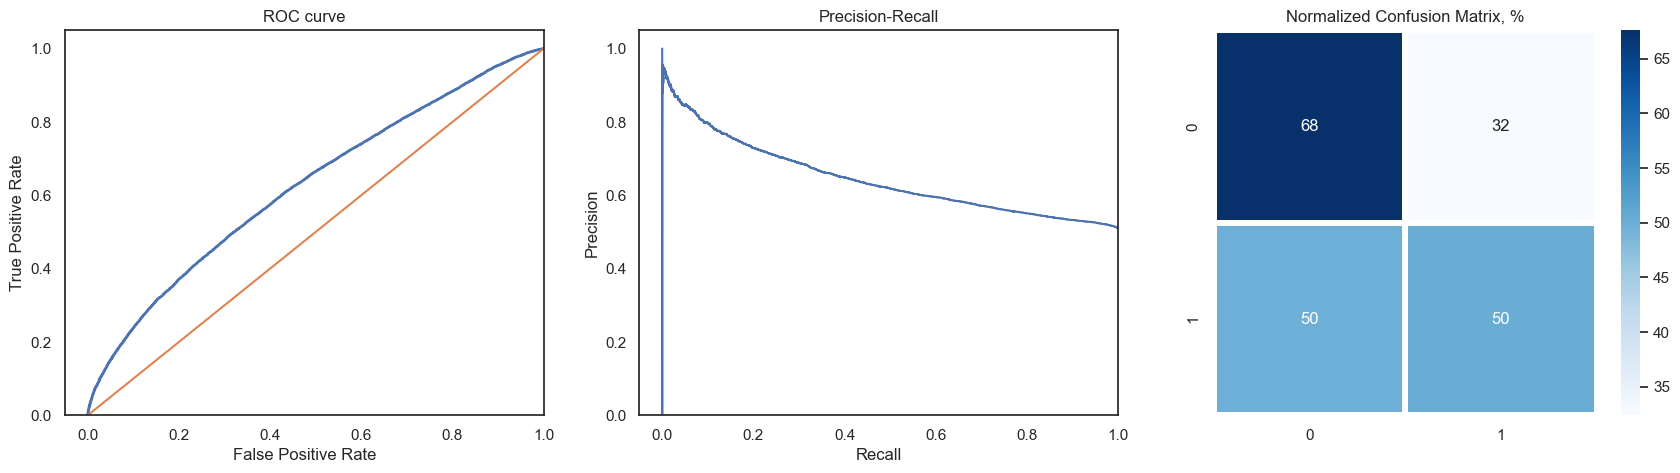

Metrics values:


,metrics,score
0,accuracy,0.587458
1,precision,0.617452
2,recall,0.502237
3,f1,0.553917
4,auc,0.625623


In [65]:
create_metrics(model_cb, X_test, y_test, False)

#### LGM

In [37]:
X_train[cat_features] = X_train[cat_features].astype(float).astype("int8")
X_val[cat_features] = X_val[cat_features].astype(float).astype("int8")
X_test[cat_features] = X_test[cat_features].astype(float).astype("int8")

In [38]:
def objective_lgbm(trial):    
    params = {
        "learning_rate": trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        "max_depth ": trial.suggest_int("max_depth ", 4, 8),

        "n_estimators": 10000,
        "random_state": RANDOM_STATE,
    }

    model = LGBMClassifier(**params)

    model.fit(X_train, y_train, eval_set=(X_val, y_val),
              categorical_feature=cat_features,
              verbose=False)

    y_prob = model.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_prob, average=None)

    return score

In [72]:
# study_lgbm = optuna.create_study(direction="maximize")
# study_lgbm.optimize(objective_lgbm, n_trials=10000, timeout=3600)

# study_lgbm.best_trial.values

[I 2023-04-17 09:23:01,376] A new study created in memory with name: no-name-ed3d3453-78a0-40d4-8a4d-a813a7186755


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-17 09:25:10,214] Trial 0 finished with value: 0.6665727332221074 and parameters: {'learning_rate': 0.001211915959258819, 'max_depth ': 6}. Best is trial 0 with value: 0.6665727332221074.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-17 09:26:39,135] Trial 1 finished with value: 0.6371153055511343 and parameters: {'learning_rate': 0.049995950105959454, 'max_depth ': 6}. Best is trial 0 with value: 0.6665727332221074.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-17 09:28:12,866] Trial 2 finished with value: 0.658489910517617 and parameters: {'learning_rate': 0.00782996426996451, 'max_depth ': 6}. Best is trial 0 with value: 0.6665727332221074.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-17 09:29:47,800] Trial 3 finished with value: 0.6385988957493158 and parameters: {'learning_rate': 0.04479214774390759, 'max_depth ': 5}. Best is trial 0 with value: 0.6665727332221074.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-17 09:31:22,726] Trial 4 finished with value: 0.6506984715179045 and parameters: {'learning_rate': 0.017073291579179098, 'max_depth ': 8}. Best is trial 0 with value: 0.6665727332221074.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-17 09:32:47,208] Trial 5 finished with value: 0.6326311422372201 and parameters: {'learning_rate': 0.07035176815699018, 'max_depth ': 7}. Best is trial 0 with value: 0.6665727332221074.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-17 09:35:10,163] Trial 6 finished with value: 0.6666442631830712 and parameters: {'learning_rate': 0.0010095361438064593, 'max_depth ': 7}. Best is trial 6 with value: 0.6666442631830712.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-17 09:36:53,118] Trial 7 finished with value: 0.6642800458579323 and parameters: {'learning_rate': 0.002855686707641579, 'max_depth ': 8}. Best is trial 6 with value: 0.6666442631830712.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-17 09:38:58,587] Trial 8 finished with value: 0.6656786054574149 and parameters: {'learning_rate': 0.0020388652844278866, 'max_depth ': 6}. Best is trial 6 with value: 0.6666442631830712.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-17 09:40:37,588] Trial 9 finished with value: 0.640856191102763 and parameters: {'learning_rate': 0.034879243237681205, 'max_depth ': 4}. Best is trial 6 with value: 0.6666442631830712.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-17 09:42:19,567] Trial 10 finished with value: 0.6625440277784403 and parameters: {'learning_rate': 0.005044572526583918, 'max_depth ': 7}. Best is trial 6 with value: 0.6666442631830712.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-17 09:44:34,012] Trial 11 finished with value: 0.6666462841587169 and parameters: {'learning_rate': 0.0010022407867354849, 'max_depth ': 7}. Best is trial 11 with value: 0.6666462841587169.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-17 09:46:43,388] Trial 12 finished with value: 0.666848007669299 and parameters: {'learning_rate': 0.0010235964689854504, 'max_depth ': 7}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-17 09:48:30,317] Trial 13 finished with value: 0.6655078254258685 and parameters: {'learning_rate': 0.0023607100435710576, 'max_depth ': 7}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-17 09:50:44,170] Trial 14 finished with value: 0.6666624660586682 and parameters: {'learning_rate': 0.0011485210635135737, 'max_depth ': 8}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-17 09:52:27,406] Trial 15 finished with value: 0.6631548514040794 and parameters: {'learning_rate': 0.003952335750453925, 'max_depth ': 8}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-17 09:54:24,847] Trial 16 finished with value: 0.6660604289065438 and parameters: {'learning_rate': 0.0018135584540889288, 'max_depth ': 8}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-17 09:56:26,524] Trial 17 finished with value: 0.6666241293216244 and parameters: {'learning_rate': 0.0015684212599333175, 'max_depth ': 5}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-17 09:58:11,552] Trial 18 finished with value: 0.6643160103338643 and parameters: {'learning_rate': 0.003239463818965612, 'max_depth ': 8}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-17 10:00:08,605] Trial 19 finished with value: 0.6662659233148164 and parameters: {'learning_rate': 0.0016242833000846425, 'max_depth ': 7}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-17 10:01:47,936] Trial 20 finished with value: 0.6620673876114194 and parameters: {'learning_rate': 0.0056182110061480574, 'max_depth ': 5}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-17 10:04:04,780] Trial 21 finished with value: 0.66673934011242 and parameters: {'learning_rate': 0.001074666554800056, 'max_depth ': 7}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-17 10:06:03,986] Trial 22 finished with value: 0.6664162214520928 and parameters: {'learning_rate': 0.0014661660825718683, 'max_depth ': 7}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-17 10:08:10,704] Trial 23 finished with value: 0.6651506711070306 and parameters: {'learning_rate': 0.0023518846007449155, 'max_depth ': 8}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-17 10:10:18,254] Trial 24 finished with value: 0.6667546958409969 and parameters: {'learning_rate': 0.0012972685608852624, 'max_depth ': 8}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-17 10:12:14,982] Trial 25 finished with value: 0.66568806197543 and parameters: {'learning_rate': 0.0019250323260922026, 'max_depth ': 7}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-17 10:14:01,860] Trial 26 finished with value: 0.6645173467799049 and parameters: {'learning_rate': 0.00312548118209938, 'max_depth ': 6}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-17 10:16:05,369] Trial 27 finished with value: 0.6665873397585325 and parameters: {'learning_rate': 0.0013775983170170637, 'max_depth ': 7}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-17 10:18:09,846] Trial 28 finished with value: 0.6667137667473177 and parameters: {'learning_rate': 0.0013155351807672521, 'max_depth ': 8}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-17 10:20:25,705] Trial 29 finished with value: 0.6666198792011682 and parameters: {'learning_rate': 0.001032225575460851, 'max_depth ': 6}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-17 10:22:18,639] Trial 30 finished with value: 0.6650322629679631 and parameters: {'learning_rate': 0.002507033103349493, 'max_depth ': 7}. Best is trial 12 with value: 0.666848007669299.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-17 10:24:21,620] Trial 31 finished with value: 0.6664745792922856 and parameters: {'learning_rate': 0.0013752661231445228, 'max_depth ': 8}. Best is trial 12 with value: 0.666848007669299.


[0.666848007669299]

In [39]:
# best_params_lgbm = study_lgbm.best_trial.params
# best_params_lgbm

best_params_lgbm = {'learning_rate': 0.0010235964689854504, 'max_depth ': 7}

In [40]:
# optuna.visualization.plot_param_importances(study_lgbm)

In [41]:
model_lgbm = LGBMClassifier(**best_params_lgbm,
                            n_estimators=10000,
                            random_state=RANDOM_STATE)

model_lgbm.fit(X_train, y_train,
               categorical_feature=cat_features,
               eval_set=(X_val, y_val),
               early_stopping_rounds=100,
               verbose=False)

[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


KeyboardInterrupt: 

Metrics values:


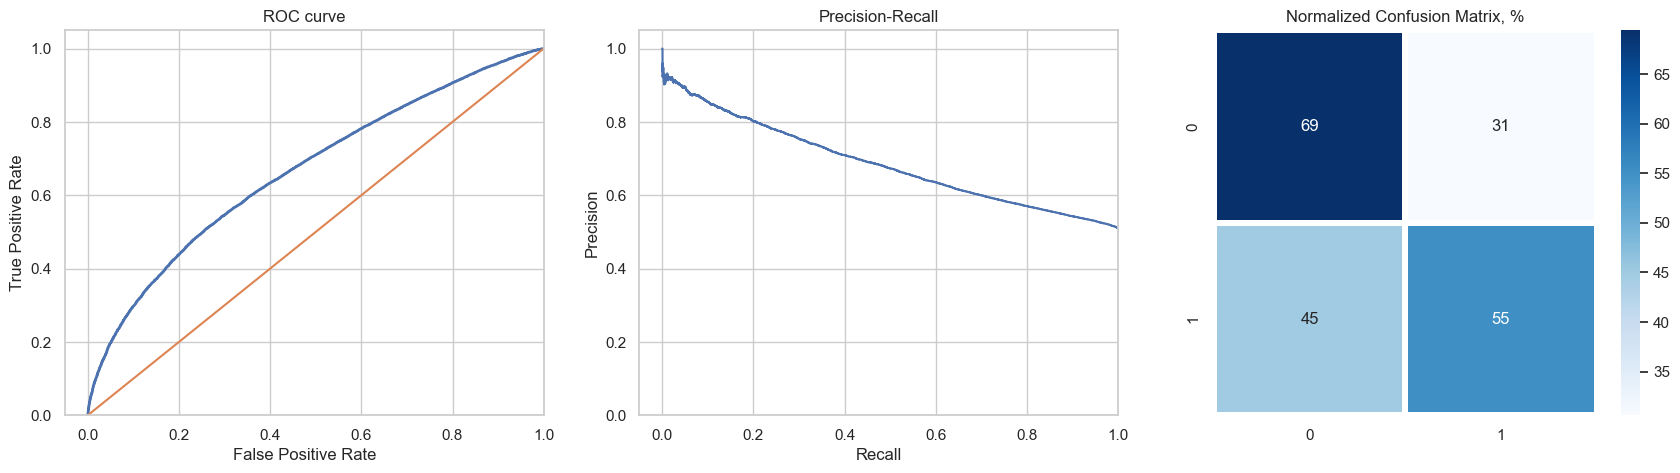

Metrics values:


,metrics,score
0,accuracy,0.621770
1,precision,0.652626
2,recall,0.552355
3,f1,0.598319
4,auc,0.666883


In [76]:
create_metrics(model_lgbm, X_test, y_test, False)

### Нейросеть PyTorch

In [42]:
ohe = OHE.fit(X_train[cat_features])

X_train_ohe = ohe.transform(X_train[cat_features]).toarray()
X_val_ohe = ohe.transform(X_val[cat_features]).toarray()
X_test_ohe = ohe.transform(X_test[cat_features]).toarray()

X_train_pt = torch.FloatTensor(np.concatenate([X_train_ohe, X_train[q_features]], 1))
X_val_pt = torch.FloatTensor(np.concatenate([X_val_ohe, X_val[q_features]], 1))
X_test_pt = torch.FloatTensor(np.concatenate([X_test_ohe, X_test[q_features]], 1))

y_train_pt = torch.FloatTensor(y_train.values)
y_val_pt = torch.FloatTensor(y_val.values)
y_test_pt = torch.FloatTensor(y_test.values)

In [43]:
class CustomEarlyStopping():
    """
    Early stopping to stop the training when the loss does not improve after
    certain epochs.
    """
    def __init__(self, patience=5, min_delta=0):
        """
        :param patience: how many epochs to wait before stopping when loss is
               not improving
        :param min_delta: minimum difference between new loss and old loss for
               new loss to be considered as an improvement
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            # reset counter if validation loss improves
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True

In [44]:
class Net(nn.Module):
    def __init__(self, n_in, n_2, n_3, n_4, n_5, n_6, n_out,
                 act1, act2, act3, act4, act5,
                 p1, p2, p3, p4, p5,
                 learning_rate=0.01):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(n_in, n_2)
        self.act1 = act1
        self.do1 = nn.Dropout(p1)
        self.bn1 = nn.BatchNorm1d(n_2)

        self.fc2 = nn.Linear(n_2, n_3)
        self.act2 = act2
        self.do2 = nn.Dropout(p2)
        self.bn2 = nn.BatchNorm1d(n_3)

        self.fc3 = nn.Linear(n_3, n_4)
        self.act3 = act3
        self.do3 = nn.Dropout(p3)
        self.bn3 = nn.BatchNorm1d(n_4)

        self.fc4 = nn.Linear(n_4, n_5)
        self.act4 = act4
        self.do4 = nn.Dropout(p4)
        self.bn4 = nn.BatchNorm1d(n_5)

        self.fc5 = nn.Linear(n_5, n_6)
        self.act5 = act5
        self.do5 = nn.Dropout(p5)
        self.bn5 = nn.BatchNorm1d(n_6)

        self.fc6 = nn.Linear(n_6, n_out)
        self.act6 = nn.Sigmoid()


        self.learning_rate = learning_rate
        self.init_weights()

    def init_weights(m):
        if isinstance(m, nn.Linear):
            torch.nn.init.kaiming_normal_(m.weight)
            m.bias.data.fill_(0.01)
        
    def forward(self, x):
        x = self.act1(self.bn1(self.fc1(x)))
        x = self.do1(x)

        x = self.act2(self.bn2(self.fc2(x)))
        x = self.do2(x)

        x = self.act3(self.bn3(self.fc3(x)))
        x = self.do3(x)

        x = self.act4(self.bn4(self.fc4(x)))
        x = self.do4(x)

        x = self.act5(self.bn5(self.fc5(x)))
        x = self.do5(x)
        
        x = self.act6(self.fc6(x))

        return x.flatten()
    
    def fit(self, X_train, y_train, cat_features=None, eval_set=None,
            num_epochs=10, batch_size=None, early_stopping_rounds=None,
            verbose=True, verbose_eval=1, plot=True):
        X_train, y_train = torch.FloatTensor(X_train), torch.FloatTensor(y_train)
        if eval_set is not None:
            eval_set[0], eval_set[1] = torch.FloatTensor(eval_set[0]), \
                                       torch.FloatTensor(eval_set[1])
            

        if batch_size is None:
            batch_size = X_train.size()[0]
        train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                   batch_size=batch_size,
                                                   shuffle=True)
        eval_loader = None
        if eval_set is not None:
            X_eval, y_eval = eval_set
            eval_dataset = torch.utils.data.TensorDataset(X_eval, y_eval)
            eval_loader = torch.utils.data.DataLoader(dataset=eval_dataset,
                                                    batch_size=batch_size,
                                                    shuffle=False)

            
        criterion = nn.BCELoss()
        optimizer = optim.Adam(self.parameters(), lr=self.learning_rate)

        early_stopping = CustomEarlyStopping(patience=early_stopping_rounds,
                                             min_delta=1)
        if plot:
            from torch.utils.tensorboard import SummaryWriter
            %load_ext tensorboard
            writer_train = SummaryWriter(log_dir='./runs/train')
            writer_test = SummaryWriter(log_dir='./runs/test')
        for epoch in range(num_epochs):
            train_predict, train_true = [], []
            eval_predict, eval_true = [], []

            for batch, (inputs, labels) in enumerate(train_loader):

                outputs = self.forward(inputs)
                loss = criterion(outputs, labels)
                    
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                train_predict.append(outputs)
                train_true.append(labels)

                if eval_loader is not None:
                    with torch.no_grad():
                        for eval_inputs, eval_labels in eval_loader:
                            eval_outputs = self.forward(eval_inputs)

                            eval_predict.append(eval_outputs)
                            eval_true.append(eval_labels)

            train_predict = np.round(torch.cat(train_predict).detach().numpy())
            train_true = torch.cat(train_true).detach().numpy()
            
            eval_predict = np.round(torch.cat(eval_predict).detach().numpy())
            eval_true = torch.cat(eval_true).detach().numpy()

            train_acc = accuracy_score(train_true, train_predict)
            eval_acc = accuracy_score(eval_true, eval_predict)

            if plot:
                writer_train.add_scalar('AUC', train_acc, epoch)
                if eval_set is not None:
                    writer_test.add_scalar('AUC', eval_acc, epoch)
            if verbose and epoch % verbose_eval == 0:
                print("------------------------------------------")
                print ("Epoch [{}/{}], train AUC: {:.4f}, AUC: {:.4f})"
                       .format(epoch+1, num_epochs, train_acc, eval_acc))
                print()
            
            early_stopping(eval_acc if eval_set is not None else train_acc)
            if early_stopping.early_stop:
                print('Early Stoppning!!!')
                break
        if plot:
            %tensorboard --logdir=runs
            writer_test.close()
            writer_train.close()

    def predict_proba(self, X):
        self.eval()
        with torch.no_grad():
            output = self.forward(X)
            return output.numpy()
        
    def predict(self, X):
        self.eval()
        with torch.no_grad():
            output = torch.round(self.forward(X))
            return output.numpy()

In [80]:
def objective_nn(trial):
    #dropout
    p1 = trial.suggest_float('p1', 0.0, 0.3, step=0.1) 
    p2 = trial.suggest_float('p2', 0.0, 0.3, step=0.1) 
    p3 = trial.suggest_float('p3', 0.0, 0.3, step=0.1)
    p4 = trial.suggest_float('p4', 0.0, 0.3, step=0.1)
    p5 = trial.suggest_float('p5', 0.0, 0.3, step=0.1)

    # activation
    activation_dict = {"nn.Sigmoid()": nn.Sigmoid(),
                       "nn.Tanh()": nn.Tanh()}
    
    activation_list = ["nn.Sigmoid()", "nn.Tanh()"]
    act1 = trial.suggest_categorical('act1', activation_list)
    act2 = trial.suggest_categorical('act2', activation_list)
    act3 = trial.suggest_categorical('act3', activation_list)
    act4 = trial.suggest_categorical('act4', activation_list)
    act5 = trial.suggest_categorical('act5', activation_list)
    
    act1 = activation_dict.get(act1)
    act2 = activation_dict.get(act2)
    act3 = activation_dict.get(act3)
    act4 = activation_dict.get(act4)
    act5 = activation_dict.get(act5)

    #number of neuros
    n_in, n_out = X_train_pt.shape[-1], 1
    
    n_2 = trial.suggest_int('n_2', 10, 1000,  step=50)
    n_3 = trial.suggest_int('n_3', 10, 1000,  step=50)
    n_4 = trial.suggest_int('n_4', 10, 1000,  step=50)
    n_5 = trial.suggest_int('n_5', 10, 1000,  step=50)
    n_6 = trial.suggest_int('n_6', 10, 1000,  step=50)
    
    #learning rate
    lr = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
    
    #batch size 
    batch_size = trial.suggest_int('batch_size', 5000, 50000,  step=5000)
    
    model = Net(n_in=n_in,
                n_2=n_2, n_3=n_3, n_4=n_4, n_5=n_5, n_6=n_6,
                n_out=n_out,
                act1=act1, act2=act2, act3=act3, act4=act4, act5=act5,
                p1=p1, p2=p2, p3=p3, p4=p4, p5=p5,
                learning_rate=lr)
    
    skorch_classifier = NeuralNetClassifier(module=model,
                                            device='cpu',
                                            verbose=0,
                                            batch_size=batch_size,
                                            optimizer=torch.optim.Adam,
                                            max_epochs=20000,
                                            lr=lr,
                                            train_split=ValidSplit(cv=5),
                                            criterion =nn.MSELoss,
                                            callbacks=[
                ('val_rmse', EpochScoring(scoring=SCORER, lower_is_better=False, name='AUC')),
                ('estoper', EarlyStopping(lower_is_better=False, monitor='AUC', patience=100)),
            ])

    y_prob = model.predict_proba(X_test_pt)
    score = roc_auc_score(y_test, y_prob, average=None)

    return score

In [81]:
start = time.time()

study_nn = optuna.create_study(direction="maximize")
study_nn.optimize(objective_nn, n_trials=100_000, timeout=5400)

print()
end = time.time()
exec_time(start, end)

[I 2023-04-17 10:26:41,058] A new study created in memory with name: no-name-2ec2fde0-ff04-45c8-9512-9803f81aa389
[I 2023-04-17 10:27:20,803] Trial 0 finished with value: 0.4887408898884864 and parameters: {'p1': 0.2, 'p2': 0.2, 'p3': 0.0, 'p4': 0.1, 'p5': 0.0, 'act1': 'nn.Tanh()', 'act2': 'nn.Tanh()', 'act3': 'nn.Tanh()', 'act4': 'nn.Tanh()', 'act5': 'nn.Tanh()', 'n_2': 510, 'n_3': 110, 'n_4': 360, 'n_5': 860, 'n_6': 360, 'learning_rate': 0.007599635893470261, 'batch_size': 20000}. Best is trial 0 with value: 0.4887408898884864.
[I 2023-04-17 10:28:04,802] Trial 1 finished with value: 0.46208918465775906 and parameters: {'p1': 0.0, 'p2': 0.0, 'p3': 0.0, 'p4': 0.0, 'p5': 0.0, 'act1': 'nn.Sigmoid()', 'act2': 'nn.Sigmoid()', 'act3': 'nn.Tanh()', 'act4': 'nn.Tanh()', 'act5': 'nn.Sigmoid()', 'n_2': 460, 'n_3': 610, 'n_4': 560, 'n_5': 560, 'n_6': 10, 'learning_rate': 0.0044816329927024855, 'batch_size': 10000}. Best is trial 0 with value: 0.4887408898884864.
[I 2023-04-17 10:28:45,893] Tria

'Completed for 01:30:06'

In [82]:
study_nn.best_trial.values

[0.55060209027863]

In [83]:
best_params_nn = study_nn.best_trial.params
best_params_nn

{'p1': 0.1,
 'p2': 0.3,
 'p3': 0.0,
 'p4': 0.0,
 'p5': 0.0,
 'act1': 'nn.Tanh()',
 'act2': 'nn.Sigmoid()',
 'act3': 'nn.Tanh()',
 'act4': 'nn.Sigmoid()',
 'act5': 'nn.Tanh()',
 'n_2': 460,
 'n_3': 310,
 'n_4': 510,
 'n_5': 510,
 'n_6': 210,
 'learning_rate': 0.0027445738912301905,
 'batch_size': 45000}

In [84]:
# n_in, n_out = X_train_pt.shape[-1], 1
# n_2, n_3, n_4, n_5, n_6 = best_params_nn['n_2'], best_params_nn['n_3'], \
#     best_params_nn['n_4'], best_params_nn['n_5'], best_params_nn['n_6']
    

# p1, p2, p3, p4, p5 = best_params_nn['p1'], best_params_nn['p2'], \
#     best_params_nn['p3'], best_params_nn['p4'], best_params_nn['p5'],


# activation_dict = {
#     "nn.Sigmoid()": nn.Sigmoid(),
#     "nn.Tanh()": nn.Tanh()}
# act1, act2, act3, act4, act5 = best_params_nn['act1'], best_params_nn['act2'], \
#     best_params_nn['act3'], best_params_nn['act4'], best_params_nn['act5']
# act1 = activation_dict.get(act1)
# act2 = activation_dict.get(act2)
# act3 = activation_dict.get(act3)
# act4 = activation_dict.get(act4)
# act5 = activation_dict.get(act5)


# lr = best_params_nn['learning_rate']


# model_nn = Net(n_in, n_2, n_3, n_4, n_5, n_6, n_out,
#                act1, act2, act3, act4, act5,
#                p1, p2, p3, p4, p5,
#                learning_rate=lr)
# print("Model initialized.")

Model initialized.


In [85]:
# model_nn.fit(X_train_pt, y_train_pt,
#              cat_features=cat_features,
#              eval_set=[X_val_pt, y_val_pt],
#              num_epochs=20000,
#              batch_size=best_params_nn["batch_size"],
#              early_stopping_rounds=100,
#              verbose=True, verbose_eval=10, plot=True)

------------------------------------------
Epoch [1/20000], train RMSE: 0.5114, RMSE: 0.5007)

INFO: Early stopping counter 1 of 100
INFO: Early stopping counter 2 of 100
INFO: Early stopping counter 3 of 100
INFO: Early stopping counter 4 of 100
INFO: Early stopping counter 5 of 100
INFO: Early stopping counter 6 of 100
INFO: Early stopping counter 7 of 100
INFO: Early stopping counter 8 of 100
INFO: Early stopping counter 9 of 100
------------------------------------------
Epoch [11/20000], train RMSE: 0.5648, RMSE: 0.5607)

INFO: Early stopping counter 10 of 100
INFO: Early stopping counter 11 of 100
INFO: Early stopping counter 12 of 100
INFO: Early stopping counter 13 of 100
INFO: Early stopping counter 14 of 100
INFO: Early stopping counter 15 of 100
INFO: Early stopping counter 16 of 100
INFO: Early stopping counter 17 of 100
INFO: Early stopping counter 18 of 100
INFO: Early stopping counter 19 of 100


# Проведите анализ важности факторов ДТП

Feature importances:


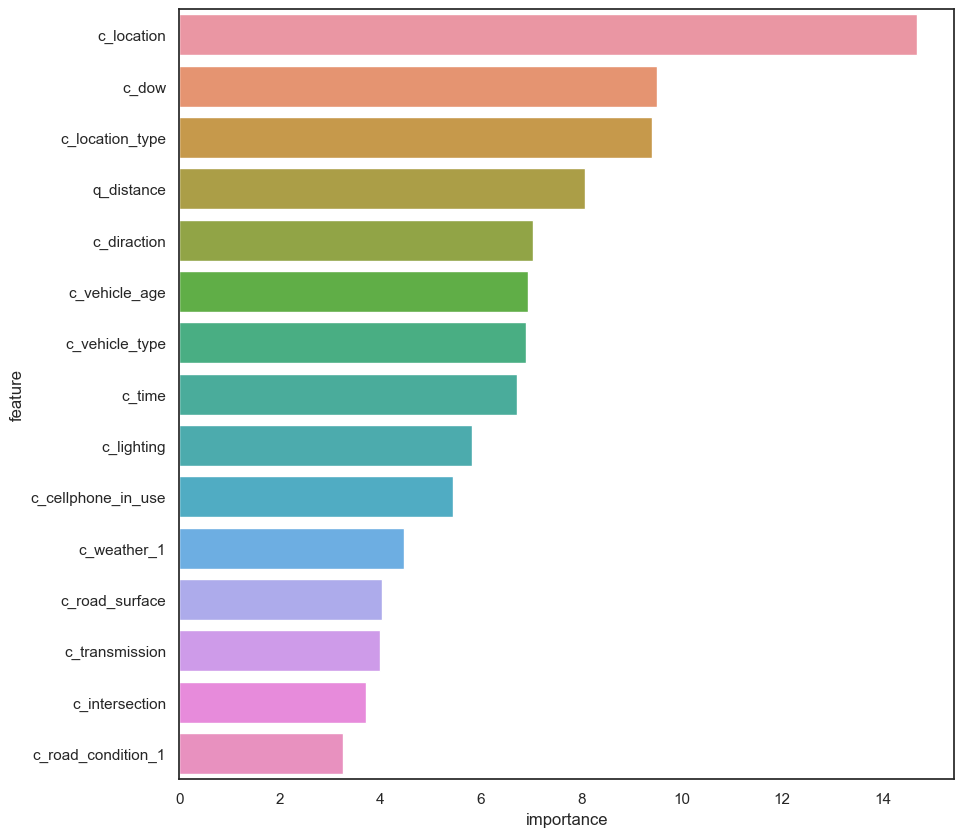

In [66]:
get_feature_importances(model=model_cb, X_train=X_train)

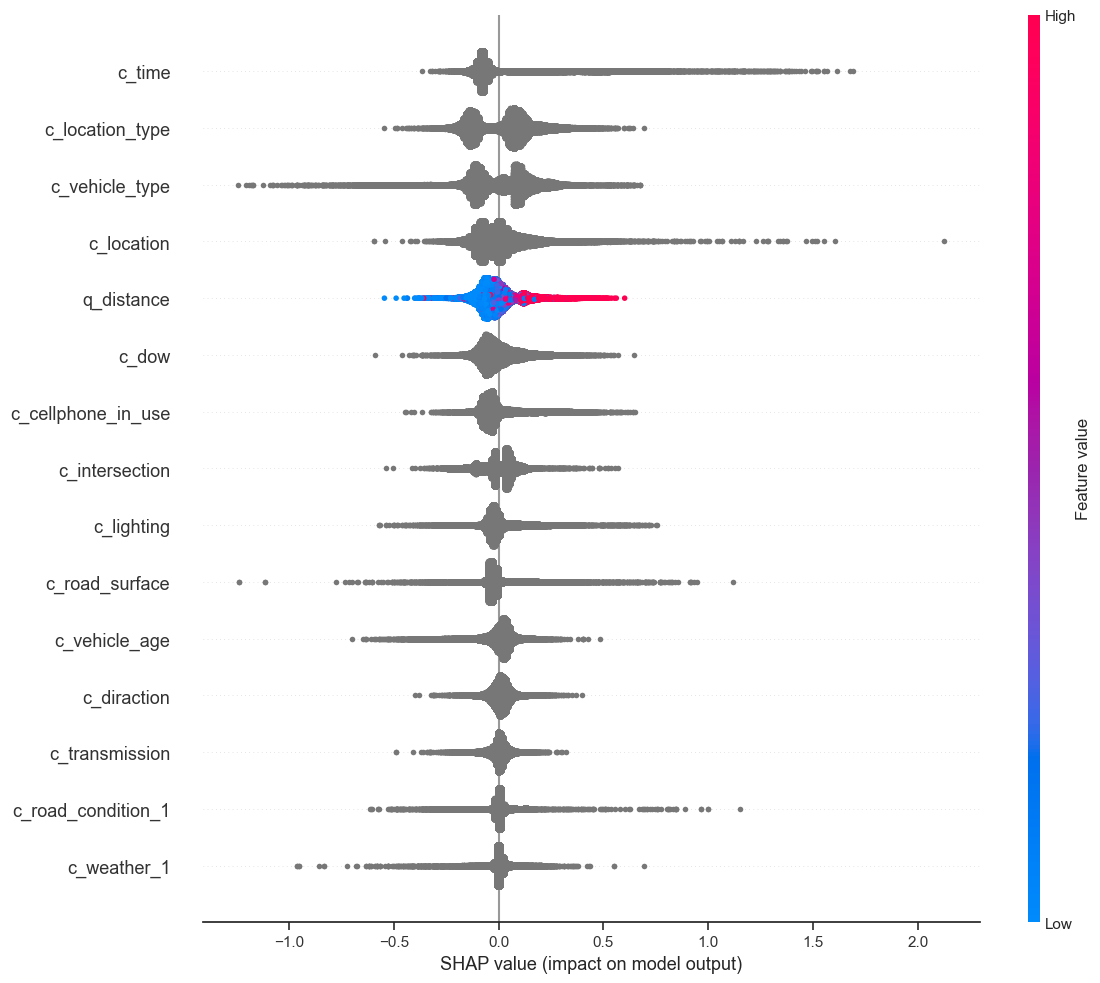

In [67]:
get_shap(model_cb, X_train, y_train)

# Выводы